In [79]:
import pandas as pd
import numpy as np
import glob
import os
import io
from functools import reduce
import scipy
from scipy import stats
from IPython.display import display_html
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_style(style='whitegrid')
%matplotlib inline

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s:%(message)s')
pd.set_option("display.max_rows",50)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Analisi degli open data del sistema Biblioteche di Roma.

In [331]:
# vedi link a:
# https://www.bibliotechediroma.it/it/open-data-biblioteche-di-roma

In [332]:
# nota per chi vuole riutilizzare il codice: sostituire i percorsi alle cartelle nelle variabili [path]

# 1. Posseduto per mese settembre 2017 - maggio 2018

In [80]:
# view source: https://www.bibliotechediroma.it/it/open-data-posseduto-biblioteca-per-tipo-documento
string_posseduto_per_tipo_doc = """
<table border="1" cellpadding="1" cellspacing="1" height="287" width="547">
	<thead>
		<tr>
			<th scope="col" style="width: 220px;">CAMPI OPEN DATA</th>
			<th scope="col" style="width: 267px;">DESCRIZIONE</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td style="width: 220px;">Cod. tipo documento</td>
			<td style="width: 267px;">Codice tipo documento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo Documento</td>
			<td style="width: 267px;">Tipologia posseduto</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Biblioteca inventario</td>
			<td style="width: 267px;">Codice Biblioteca che ha effettuato inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca inventario</td>
			<td style="width: 267px;">Denominazione Biblioteca che ha effettuato inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">N.Titoli</td>
			<td style="width: 267px;">Numero Titoli oggetto di inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">N.Inventari</td>
			<td style="width: 267px;">Numero di inventariazioni</td>
		</tr>
	</tbody>
</table>
"""

In [81]:
# mappare i nomi delle colonne da sostituire ai nomi dei df con le transazioni
path_posseduto = '/Users/marcogoldin/Documents/P_IVA_conto/MLOL/webinar_data_anayltics/Blog_post_Dati/archivio_medium_post_luglio_2018/nuove_acquisizioni/posseduto_per_mese'
colonne_posseduto_per_mese = pd.read_html(string_posseduto_per_tipo_doc)
colonne_posseduto_per_mese = colonne_posseduto_per_mese[0]
colonne_posseduto_per_mese = colonne_posseduto_per_mese.reset_index()
map_posseduto_per_mese = (pd.Series(colonne_posseduto_per_mese['CAMPI OPEN DATA'],
                           index=colonne_posseduto_per_mese['index'])
                 .to_dict())

p1 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_settembre_2017.csv'), header=None, sep='\t')
p1['Data'] = '30/09/2017'

p2 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_ottobre_2017.csv'), header=None, sep='\t')
p2['Data'] = '31/10/2017'

p3 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_novembre_2017.csv'), header=None, sep='\t')
p3['Data'] = '30/11/2017'

p4 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_dicembre_2017.csv'), header=None, sep='\t')
p4['Data'] = '31/12/2017'

p5 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_gennaio_2018.csv'), header=None, sep='\t')
p5['Data'] = '31/01/2018'

p6 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_febbraio_2018.csv'), header=None, sep='\t')
p6['Data'] = '28/02/2018'

p7 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_marzo_2018.csv'), header=None, sep='\t')
p7['Data'] = '31/03/2018'

p8 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_aprile_2018.csv'), header=None, sep='\t')
p8['Data'] = '30/04/2018'

p9 = pd.read_csv(os.path.join(path_posseduto, 'POSSEDUTO_TIPO_DOC_PER_BIB_01_maggio_2018.csv'), header=None, sep='\t')
p9['Data'] = '31/05/2018'

posseduto_sett_2017_mag_2018 = p1.append(p2).append(p3).append(p4).append(p5).append(p6).append(p7).append(p8).append(p9)
posseduto_sett_2017_mag_2018.columns = posseduto_sett_2017_mag_2018.columns.map(map_posseduto_per_mese)
posseduto_sett_2017_mag_2018 = posseduto_sett_2017_mag_2018.rename(columns={np.nan:'Data'})
posseduto_sett_2017_mag_2018['Data'] = pd.to_datetime(posseduto_sett_2017_mag_2018['Data'], format='%d/%m/%Y')
posseduto_sett_2017_mag_2018.index = posseduto_sett_2017_mag_2018['Data'] 
posseduto_sett_2017_mag_2018['Mese'] = posseduto_sett_2017_mag_2018.index.month
posseduto_sett_2017_mag_2018['Mese'] = posseduto_sett_2017_mag_2018['Mese'].apply(lambda x: calendar.month_abbr[x])
logging.info('Len df: {}'.format(len(posseduto_sett_2017_mag_2018)))
posseduto_sett_2017_mag_2018.head()


2018-07-26 09:31:34,455 INFO:Len df: 5802


,Cod. tipo documento,Tipo Documento,Cod. Biblioteca inventario,Biblioteca inventario,N.Titoli,N.Inventari,Data,Mese
Data,,,,,,,,
2017-09-30,#A,Titolo uniforme,V1,BIBLIOTECA GALLINE BIANCHE,1,1,2017-09-30,Sep
2017-09-30,#C,Collana,R1,BIBLIOTECA COLLI PORTUENSI,1,1,2017-09-30,Sep
2017-09-30,#D,Altro titolo,A3,BIBLIOTECA ENZO TORTORA,1,1,2017-09-30,Sep
2017-09-30,AC,CD-ROM,A1,BIBLIOTECA EUROPEA,7,7,2017-09-30,Sep
2017-09-30,AC,CD-ROM,A2,BIBLIOTECA RISPOLI,2,2,2017-09-30,Sep


In [82]:
# filtro solo la tipologia "Testo a stampa (moderno)"
posseduto_sett_2017_mag_2018 = (posseduto_sett_2017_mag_2018[posseduto_sett_2017_mag_2018['Tipo Documento'] == 'Testo a stampa (moderno)'])
logging.info(' Totale biblioteche nel dataset: {}'.format(len(posseduto_sett_2017_mag_2018['Biblioteca inventario'].unique())))

2018-07-26 09:31:35,722 INFO: Totale biblioteche nel dataset: 58


In [83]:
posseduto_sett_2017_mag_2018 = (pd.pivot_table(posseduto_sett_2017_mag_2018,
                                               values='N.Titoli',
                                               index=['Biblioteca inventario'], columns=['Mese'], aggfunc='sum')).reset_index()

posseduto_cols = ['Biblioteca inventario', 'Sep', 'Oct', 'Nov', 'Dec',  'Jan', 'Feb', 'Mar', 'Apr', 'May']
posseduto_sett_2017_mag_2018 = posseduto_sett_2017_mag_2018[posseduto_cols]

In [84]:
posseduto_sett_2017_mag_2018.isnull().sum()

Mese
Biblioteca inventario    0
Sep                      5
Oct                      5
Nov                      5
Dec                      5
Jan                      5
Feb                      4
Mar                      3
Apr                      3
May                      2
dtype: int64

In [85]:
logging.info('Lunghezza df con null: {}'.format(len(posseduto_sett_2017_mag_2018)))
biblio_con_null = [i for i in posseduto_sett_2017_mag_2018['Biblioteca inventario'].unique()]
posseduto_sett_2017_mag_2018 = posseduto_sett_2017_mag_2018.dropna()
biblio_senza_null = [i for i in posseduto_sett_2017_mag_2018['Biblioteca inventario'].unique()]
logging.info('Lunghezza df senza null: {}'.format(len(posseduto_sett_2017_mag_2018)))

2018-07-26 09:31:39,886 INFO:Lunghezza df con null: 58
2018-07-26 09:31:39,889 INFO:Lunghezza df senza null: 51


In [86]:
biblio_con_null = [i for i in biblio_con_null if i not in biblio_senza_null]
biblio_con_null

['BIBLIOTECA RISPOLI',
 'BIBLIOTECA TULLIO DE MAURO',
 'BIBLIOTECA VILLA MERCEDE',
 'CASA DELLE LETTERATURE',
 'PIM CENTRALE',
 'REBIBBIA RECLUSIONE 2',
 'REBIBBIA TERZA CASA']

# 2. Prestiti giugno-ottobre 2017

In [87]:
string_prestiti_per_mese = """
<table border="1" cellpadding="1" cellspacing="1" height="287" width="547">
	<thead>
		<tr>
			<th scope="col" style="width: 220px;">CAMPI OPEN DATA</th>
			<th scope="col" style="width: 267px;">DESCRIZIONE</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td style="width: 220px;">Identificativo Titolo</td>
			<td style="width: 267px;">Identificativo Titolo</td>
		</tr>
		<tr>
			<td style="width: 220px;">Titolo</td>
			<td style="width: 267px;">Titolo (campo ISBD completo)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Titoli in indice</td>
			<td style="width: 267px;">Titolo presente nell'Indice Bibliotecario nazionale (SI/NO)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo materiale</td>
			<td style="width: 267px;">Codice Tipo Materiale</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo materiale</td>
			<td style="width: 267px;">Tipo materiale descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo documento</td>
			<td style="width: 267px;">Codice Tipo Documento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo documento</td>
			<td style="width: 267px;">Tipo documento descrizion estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. natura</td>
			<td style="width: 267px;">Codice Natura</td>
		</tr>
		<tr>
			<td style="width: 220px;">Natura</td>
			<td style="width: 267px;">Natura descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo monografia</td>
			<td style="width: 267px;">Codice Tipo Monografia</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo monografia</td>
			<td style="width: 267px;">Tipo monografia descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Anno di pubblicazione</td>
			<td style="width: 267px;">Anno di pubblicazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. genere 1</td>
			<td style="width: 267px;">Codice Genere 1</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 1</td>
			<td style="width: 267px;">Genere 1 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. genere 2</td>
			<td style="width: 267px;">Codice Genere 2</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 2</td>
			<td style="width: 267px;">Genere 2 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Genere 3</td>
			<td style="width: 267px;">Codice Genere 3</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 3</td>
			<td style="width: 267px;">Genere 3 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Genere 4</td>
			<td style="width: 267px;">Codice Genere 4</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 4</td>
			<td style="width: 267px;">Genere 4 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 1</td>
			<td style="width: 267px;">Codice Lingua 1</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 1</td>
			<td style="width: 267px;">Lingua 1 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 2</td>
			<td style="width: 267px;">Codice Lingua 2</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 2</td>
			<td style="width: 267px;">Lingua 2 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 3</td>
			<td style="width: 267px;">Codice Lingua 3</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 3</td>
			<td style="width: 267px;">Lingua 3 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Paese</td>
			<td style="width: 267px;">Codice Paese</td>
		</tr>
		<tr>
			<td style="width: 220px;">Paese</td>
			<td style="width: 267px;">Paese descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo movimento</td>
			<td style="width: 267px;">Codice Tipo Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo Movimento</td>
			<td style="width: 267px;">Tipo Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. stato movimento</td>
			<td style="width: 267px;">Codice Stato Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Stato movimento</td>
			<td style="width: 267px;">Stato Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data inizio movimento</td>
			<td>Data Inizio Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data stima fine movimento</td>
			<td style="width: 267px;">Data Stima Fine Movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data fine movimento</td>
			<td style="width: 267px;">Data Fine Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data inizio stato movimento</td>
			<td>Data Inizio Stato Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Biblioteca movimento</td>
			<td style="width: 267px;">Codice Biblioteca movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca movimento</td>
			<td style="width: 267px;">Denominazione completa Biblioteca (biblioteca prestante nel caso PIM)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo utente movimento</td>
			<td style="width: 267px;">Codice Tipo Utente Movimento (professione)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo utente movimento</td>
			<td style="width: 267px;">Tipo Utente (professione) Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo provenienza movimento</td>
			<td style="width: 267px;">Codice Tipo Provenienza</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo provenienza movimento</td>
			<td style="width: 267px;">Tipo Provenienza descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Eta' utente-movimento</td>
			<td style="width: 267px;">Età utente che ha effettuato il movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Identificativo movimento</td>
			<td style="width: 267px;">Identificativo univoco del movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Identificativo richiesta ill</td>
			<td style="width: 267px;">Identificativo univoco della richiesta ILL</td>
		</tr>
	</tbody>
</table>
"""

In [88]:
# mappare i nomi delle colonne da sostituire ai nomi dei df con le transazioni
path_prestiti = '/Users/marcogoldin/Documents/P_IVA_conto/MLOL/webinar_data_anayltics/Blog_post_Dati/archivio_medium_post_luglio_2018/prestiti'
colonne_prestiti_per_mese = pd.read_html(string_prestiti_per_mese)
colonne_prestiti_per_mese = colonne_prestiti_per_mese[0]
colonne_prestiti_per_mese = colonne_prestiti_per_mese.reset_index()
map_prestiti_per_mese = (pd.Series(colonne_prestiti_per_mese['CAMPI OPEN DATA'],
                           index=colonne_prestiti_per_mese['index'])
                 .to_dict())

allFiles = glob.glob(path_prestiti + "/*.csv")
movimenti_giugno_ottobre_2017 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None, sep='\t')
    list_.append(df)
movimenti_giugno_ottobre_2017 = pd.concat(list_)
movimenti_giugno_ottobre_2017.columns = movimenti_giugno_ottobre_2017.columns.map(map_prestiti_per_mese)



In [89]:
logging.info(' Movimenti giu-ott 2017 totali: {}'.format(len(movimenti_giugno_ottobre_2017)))
movimenti_giugno_ottobre_2017 = (
    movimenti_giugno_ottobre_2017[(movimenti_giugno_ottobre_2017['Natura'] == 'Monografia')
                                  & (movimenti_giugno_ottobre_2017['Tipo materiale'] == 'Libro moderno')
                                  & (movimenti_giugno_ottobre_2017['Tipo documento'] == 'Testo a stampa (moderno)')
                                  & (movimenti_giugno_ottobre_2017['Tipo monografia'] == 'Uniche')
                                 ]
)
logging.info(' Movimenti giu-ott solo libri: {}'.format(len(movimenti_giugno_ottobre_2017)))

2018-07-26 09:31:50,704 INFO: Movimenti giu-ott 2017 totali: 303608
2018-07-26 09:31:51,488 INFO: Movimenti giu-ott solo libri: 224033


In [90]:
movimenti_giugno_ottobre_2017.columns

Index(['Identificativo Titolo', 'Titolo', 'Titoli in indice',
       'Cod. tipo materiale', 'Tipo materiale', 'Cod. tipo documento',
       'Tipo documento', 'Cod. natura', 'Natura', 'Cod. tipo monografia',
       'Tipo monografia', 'Anno di pubblicazione', 'Cod. genere 1', 'Genere 1',
       'Cod. genere 2', 'Genere 2', 'Cod. Genere 3', 'Genere 3',
       'Cod. Genere 4', 'Genere 4', 'Cod. Lingua 1', 'Lingua 1',
       'Cod. Lingua 2', 'Lingua 2', 'Cod. Lingua 3', 'Lingua 3', 'Cod. Paese',
       'Paese', 'Cod. tipo movimento', 'Tipo Movimento',
       'Cod. stato movimento', 'Stato movimento', 'Data inizio movimento',
       'Data stima fine movimento', 'Data fine movimento',
       'Data inizio stato movimento', 'Cod. Biblioteca movimento',
       'Biblioteca movimento', 'Cod. tipo utente movimento',
       'Tipo utente movimento', 'Cod. tipo provenienza movimento',
       'Tipo provenienza movimento', 'Eta' utente-movimento',
       'Identificativo movimento', 'Identificativo richi

In [91]:
movimenti_giugno_ottobre_2017 = movimenti_giugno_ottobre_2017[['Identificativo Titolo', 'Titolo',
       'Cod. tipo materiale', 'Tipo materiale', 'Cod. tipo documento',
       'Tipo documento', 'Cod. natura', 'Natura', 'Cod. tipo monografia',
       'Tipo monografia', 'Anno di pubblicazione', 'Cod. Lingua 1', 'Lingua 1','Cod. Paese',
       'Paese', 'Cod. tipo movimento', 'Tipo Movimento','Data inizio movimento',
       'Biblioteca movimento', 'Cod. tipo utente movimento',
       'Tipo utente movimento', 'Eta\' utente-movimento',
       'Identificativo movimento']]

In [92]:
movimenti_giugno_ottobre_2017.columns

Index(['Identificativo Titolo', 'Titolo', 'Cod. tipo materiale',
       'Tipo materiale', 'Cod. tipo documento', 'Tipo documento',
       'Cod. natura', 'Natura', 'Cod. tipo monografia', 'Tipo monografia',
       'Anno di pubblicazione', 'Cod. Lingua 1', 'Lingua 1', 'Cod. Paese',
       'Paese', 'Cod. tipo movimento', 'Tipo Movimento',
       'Data inizio movimento', 'Biblioteca movimento',
       'Cod. tipo utente movimento', 'Tipo utente movimento',
       'Eta' utente-movimento', 'Identificativo movimento'],
      dtype='object')

In [93]:
# tolgo dai 224033 movimenti i prestiti interbibliotecari perché non correlati al posseduto delle biblioteche del sistema
movimenti_giugno_ottobre_2017 = (
    movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Tipo Movimento'] != 'Prestito interbibliotecario']
)
logging.info(' Len movimenti senza interbibliotecari: {}'.format(len(movimenti_giugno_ottobre_2017)))

2018-07-26 09:31:56,349 INFO: Len movimenti senza interbibliotecari: 222920


In [94]:
movimenti_giugno_ottobre_2017['Tipo Movimento'].value_counts()

Prestito esterno           200057
Prestito intersistemico    22535 
Consultazione              328   
Name: Tipo Movimento, dtype: int64

In [95]:
movimenti_giugno_ottobre_2017['Data inizio movimento'] = pd.to_datetime(movimenti_giugno_ottobre_2017['Data inizio movimento'],
                                                                       format='%d/%m/%Y')
movimenti_giugno_ottobre_2017.index = movimenti_giugno_ottobre_2017['Data inizio movimento']
movimenti_giugno_ottobre_2017 = movimenti_giugno_ottobre_2017.sort_index()


In [96]:
movimenti_giugno_ottobre_2017.isnull().sum()

Identificativo Titolo         0    
Titolo                        0    
Cod. tipo materiale           0    
Tipo materiale                0    
Cod. tipo documento           0    
Tipo documento                0    
Cod. natura                   0    
Natura                        0    
Cod. tipo monografia          0    
Tipo monografia               0    
Anno di pubblicazione         154  
Cod. Lingua 1                 0    
Lingua 1                      0    
Cod. Paese                    0    
Paese                         0    
Cod. tipo movimento           0    
Tipo Movimento                0    
Data inizio movimento         0    
Biblioteca movimento          0    
Cod. tipo utente movimento    0    
Tipo utente movimento         0    
Eta' utente-movimento         23332
Identificativo movimento      0    
dtype: int64

In [97]:
logging.info('Id movimenti unici: {} '.format(len(movimenti_giugno_ottobre_2017['Identificativo movimento'].unique())))
logging.info(' Totale movimenti (libri): {}'.format(len(movimenti_giugno_ottobre_2017)))

2018-07-26 09:32:02,541 INFO:Id movimenti unici: 222920 
2018-07-26 09:32:02,541 INFO: Totale movimenti (libri): 222920


### Totale biblioteche del sistema con movimenti di libri giu-ott 2017

In [98]:
len(movimenti_giugno_ottobre_2017['Biblioteca movimento'].unique())

42

In [99]:
[i for i in movimenti_giugno_ottobre_2017['Biblioteca movimento'].unique()]

['BIBLIOTECA GUGLIELMO MARCONI',
 'BIBLIOTECA CORNELIA',
 'BIBLIOTECA RAFFAELLO',
 'BIBLIOTECA GIORDANO BRUNO',
 'BIBLIOTECA CASA DEL PARCO',
 'BIBLIOTECA VALLE AURELIA',
 'BIBLIOTECA VACCHERIA NARDI',
 'BIBLIOTECA COLLI PORTUENSI',
 'BIBLIOTECA NELSON MANDELA',
 'BIBLIOTECA EUROPEA',
 'BIBLIOTECA SANDRO ONOFRI',
 'BIBLIOTECA ENNIO FLAIANO',
 'BIBLIOTECA CASA DEI BIMBI',
 'BIBLIOTECA RENATO NICOLINI',
 'BIBLIOTECA GALLINE BIANCHE',
 'TEATRO BIBLIOTECA QUARTICCIOLO',
 'BIBLIOTECA PENAZZATO',
 'BIBLIOTECA FRANCO BASAGLIA',
 'BIBLIOTECA LAURENTINA',
 "BIBLIOCAFFE' LETTERARIO",
 'BIBLIOTECA GIANNI RODARI',
 'BIBLIOTECA LONGHENA',
 'BIBLIOTECA ENZO TORTORA',
 'BIBLIOTECA VILLA LEOPARDI',
 'BIBLIOTECA FLAMINIA',
 'BIBLIOTECA BORGHESIANA',
 'BIBLIOTECA ELSA MORANTE',
 'BIBLIOTECA CENTRALE PER RAGAZZI',
 'BIBLIOTECA FABRIZIO GIOVENALE',
 'BIBLIOTECA PIER PAOLO PASOLINI',
 'BIBLIOTECA CASA DELLA MEMORIA',
 'BIBLIOTECA VILLINO CORSINI - VILLA PAMPHILJ',
 'BIBLIOTECA GOFFREDO MAMELI',
 'BIBLIOTEC

### biblioteche non presenti nei movimenti

In [100]:
[i for i in biblio_senza_null if i not in movimenti_giugno_ottobre_2017['Biblioteca movimento'].unique()]

['B. COSTANZO LICEO GIULIO CESARE',
 "BIBLIOTECA DELL'AVVOCATURA",
 'BIBLIOTECA DI STATISTICA',
 'BIBLIOTECA WWF ITALIA P.L.FLORIO',
 'CASAL DEL MARMO',
 'COMUNE DI ROMA - CENTRO SISTEMA',
 'REBIBBIA FEMMINILE',
 'REBIBBIA NUOVO COMPLESSO',
 'REBIBBIA RECLUSIONE 1',
 'REGINA COELI SEZIONE 3',
 'REGINA COELI SEZIONE 4',
 'REGINA COELI SEZIONE 6']

In [101]:
logging.info(' Totale prestiti intersistemici: {}'.format(len(movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Tipo Movimento'] == 'Prestito intersistemico'])))
movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Tipo Movimento'] == 'Prestito intersistemico'].isnull().sum()


2018-07-26 09:32:11,741 INFO: Totale prestiti intersistemici: 22535


Identificativo Titolo         0    
Titolo                        0    
Cod. tipo materiale           0    
Tipo materiale                0    
Cod. tipo documento           0    
Tipo documento                0    
Cod. natura                   0    
Natura                        0    
Cod. tipo monografia          0    
Tipo monografia               0    
Anno di pubblicazione         14   
Cod. Lingua 1                 0    
Lingua 1                      0    
Cod. Paese                    0    
Paese                         0    
Cod. tipo movimento           0    
Tipo Movimento                0    
Data inizio movimento         0    
Biblioteca movimento          0    
Cod. tipo utente movimento    0    
Tipo utente movimento         0    
Eta' utente-movimento         22535
Identificativo movimento      0    
dtype: int64

In [102]:
movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Tipo Movimento'] == 'Prestito intersistemico'].tail()

,Identificativo Titolo,Titolo,Cod. tipo materiale,Tipo materiale,Cod. tipo documento,Tipo documento,Cod. natura,Natura,Cod. tipo monografia,Tipo monografia,Anno di pubblicazione,Cod. Lingua 1,Lingua 1,Cod. Paese,Paese,Cod. tipo movimento,Tipo Movimento,Data inizio movimento,Biblioteca movimento,Cod. tipo utente movimento,Tipo utente movimento,Eta' utente-movimento,Identificativo movimento
Data inizio movimento,,,,,,,,,,,,,,,,,,,,,,,
2017-10-31,639884,"L'*arte del doppiaggio : doppiatori e direttori di doppiaggio / Andrea Lattanzio. - Ghezzano, [San Giuliano Terme! : Felici, 2011. - 266 p. : ill. ; 22 cm.",M,Libro moderno,LM,Testo a stampa (moderno),M,Monografia,U,Uniche,2011,ITA,ITALIANO,IT,ITALIA,PS,Prestito intersistemico,2017-10-31,BIBLIOCAFFE' LETTERARIO,BIB,BIBLIOTECA SOL,NaN,14773759
2017-10-31,354436,"*Notturni : cinque storie di musica e crepuscolo / Kazuo Ishiguro ; traduzione di Susanna Basso. - Torino : Einaudi, 2009. - 187 p. ; 23 cm",M,Libro moderno,LM,Testo a stampa (moderno),M,Monografia,U,Uniche,2009,ITA,ITALIANO,IT,ITALIA,PS,Prestito intersistemico,2017-10-31,BIBLIOTECA RAFFAELLO,BIB,BIBLIOTECA SOL,NaN,14773733
2017-10-31,178158,"Una *notte, un gatto... / Yvan Pommaux. - Milano : Babalibri, 2002. - [36] p. : tutto ill. ; 17 cm. ((Traduzione di Federica Rocca.",M,Libro moderno,LM,Testo a stampa (moderno),M,Monografia,U,Uniche,2002,ITA,ITALIANO,IT,ITALIA,PS,Prestito intersistemico,2017-10-31,BIBLIOTECA FLAMINIA,BIB,BIBLIOTECA SOL,NaN,14772772
2017-10-31,821911,"L'*ora dei gentiluomini / Don Winslow ; traduzione di Alfredo Colitto. - Torino : Einaudi, 2016. - 376 p. ; 22 cm",M,Libro moderno,LM,Testo a stampa (moderno),M,Monografia,U,Uniche,2016,ITA,ITALIANO,IT,ITALIA,PS,Prestito intersistemico,2017-10-31,BIBLIOTECA ELSA MORANTE,BIB,BIBLIOTECA SOL,NaN,14771506
2017-10-31,641301,"La *via di fuga : romanzo / James Dashner ; traduzione dall'inglese di Silvia Romano. - Roma : Fanucci, 2012. - 349 p. ; 23 cm. ((Secondo volume della trilogia: The Maze Runner; primo volume: Il labirinto",M,Libro moderno,LM,Testo a stampa (moderno),M,Monografia,U,Uniche,2012,ITA,ITALIANO,IT,ITALIA,PS,Prestito intersistemico,2017-10-31,BIBLIOTECA VACCHERIA NARDI,BIB,BIBLIOTECA SOL,NaN,14772181


# Distribuzione dei titoli consultati giugno-ottobre 2017

In [103]:
titoli_consultati = movimenti_giugno_ottobre_2017.groupby('Identificativo Titolo').size().reset_index().rename(columns={0:'Movimenti'})
titoli_consultati = titoli_consultati.sort_values('Movimenti', ascending=False)
titoli_unici = (movimenti_giugno_ottobre_2017[['Identificativo Titolo','Titolo','Anno di pubblicazione']]
                .drop_duplicates('Identificativo Titolo'))
titoli_consultati = (titoli_consultati.merge(titoli_unici,
                                             left_on='Identificativo Titolo',
                                             right_on='Identificativo Titolo',
                                             how='left'))
titoli_consultati.head()

,Identificativo Titolo,Movimenti,Titolo,Anno di pubblicazione
0,823950,264,"Le *otto montagne / Paolo Cognetti. - Torino : Einaudi, 2016. - 199 p. ; 22 cm.",2016
1,841203,182,"La *più amata : romanzo / Teresa Ciabatti. - Milano : Mondadori, 2017. - 218 p. ; 24 cm. ((A pagina IV di copertina: eBook disponibile",2017
2,811765,161,"*Magnifica / Maria Rosaria Valentini. - Palermo : Sellerio, 2016. - 268 p. ; 21 cm",2016
3,825236,160,"*Cleopatra va in prigione / Claudia Durastanti. - Roma : Minimum fax, 2016. - 129 p. ; 21 cm",2016
4,758709,154,"La *ragazza del treno / Paula Hawkins ; traduzione di Barbara Porteri. - Milano : Piemme, 2015. - 306 p. ; 24 cm.",2015


In [104]:
logging.info(' Len titoli_consultati: {}'.format(len(titoli_consultati)))

2018-07-26 09:32:19,354 INFO: Len titoli_consultati: 84560


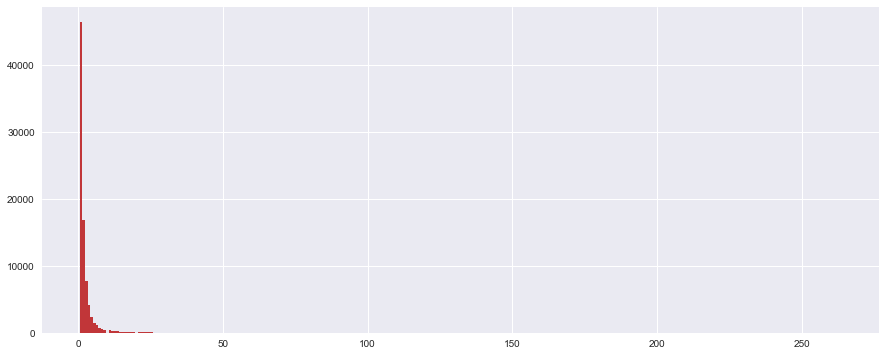

In [105]:
x = titoli_consultati[['Identificativo Titolo','Movimenti']]
#x.index = x['Identificativo Titolo']
sns.set_style('darkgrid')
sns.set_palette('RdBu')
plt.figure(figsize=(15,6))
plt.hist(x['Movimenti'].values, bins=int(np.sqrt(len(x))), align='left')
plt.show()

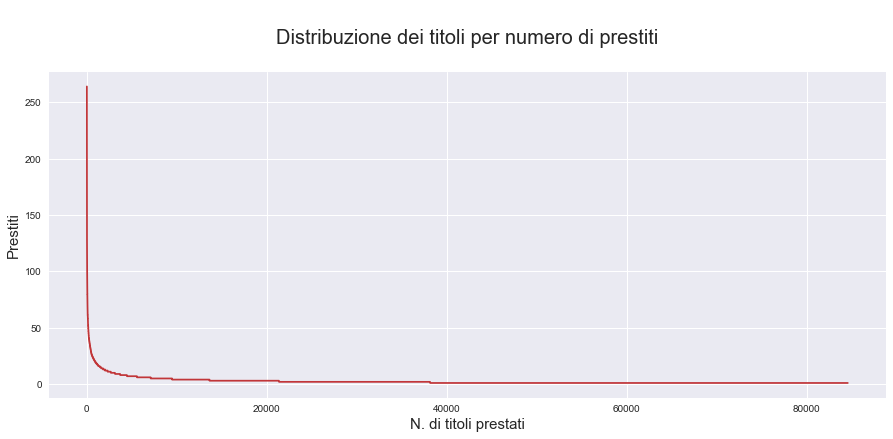

In [106]:
plt.figure(figsize=(15,6))
plt.plot(x['Movimenti'])
plt.title('\nDistribuzione dei titoli per numero di prestiti\n', fontsize=20)
plt.xlabel('N. di titoli prestati', fontsize=15)
plt.ylabel('Prestiti', fontsize=15)
plt.show()

In [107]:
x[['Movimenti']].describe()[3:]

,Movimenti
min,1.0
25%,1.0
50%,1.0
75%,3.0
max,264.0


## movimenti dei titoli > 75. percentile

In [108]:
q4 = x[x['Movimenti'] > np.percentile(x['Movimenti'], 75)]
len(q4)

13623

In [109]:
np.sum(q4['Movimenti'])

119750

In [110]:
logging.info('Percentuale sui prestiti del 4. quartile: {}'.format( (np.sum(q4['Movimenti'])/np.sum(x['Movimenti'])) * 100))

2018-07-26 09:32:28,551 INFO:Percentuale sui prestiti del 4. quartile: 53.718822896106225


### funzione di ripartizione empirica dei prestiti per titolo

In [111]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

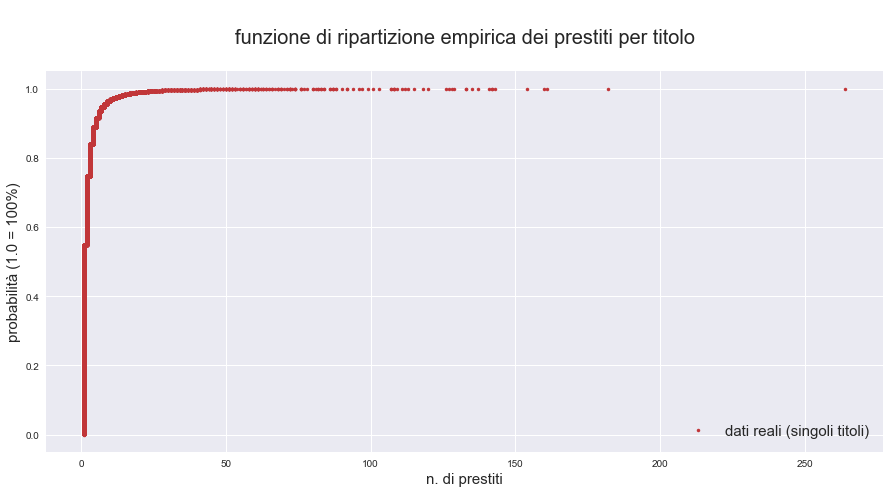

In [112]:
x_data,y_data = ecdf(x['Movimenti'])

tau = np.mean(x['Movimenti'])
inter_x = np.random.exponential(tau,size=10000)
x_tau,y_tau = ecdf(inter_x)

plt.figure(figsize=(15,7))
plt.plot(x_data,y_data,marker='.', linestyle='none', label='dati reali (singoli titoli)')
#plt.plot(x_tau, y_tau, color='b', linewidth=5, label='funzione esponenziale teorica')
#plt.hist(inter_x, bins=int(np.sqrt(len(x))), density=True)
plt.title('\nfunzione di ripartizione empirica dei prestiti per titolo\n', fontsize=20)
plt.xlabel('n. di prestiti', fontsize=15)
plt.ylabel('probabilità (1.0 = 100%)', fontsize=15)
plt.legend(fontsize=15)
plt.margins(0.05)
plt.show()

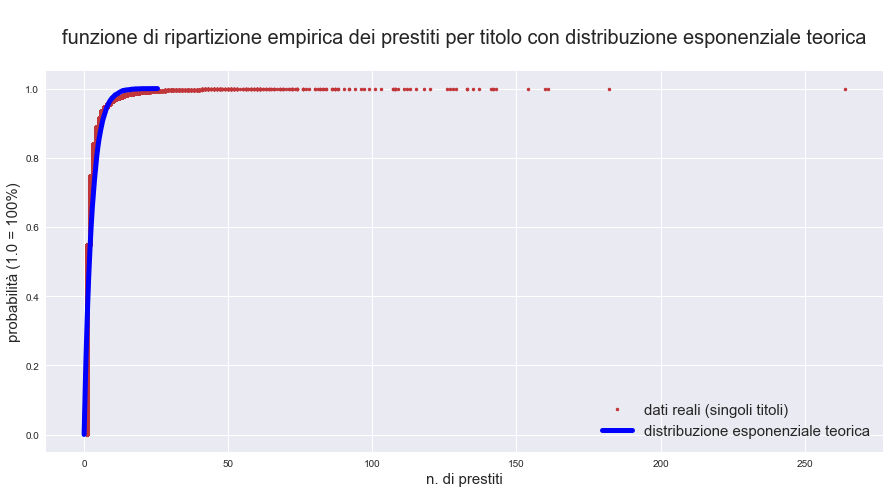

In [113]:
x_data,y_data = ecdf(x['Movimenti'])

tau = np.mean(x['Movimenti'])
inter_x = np.random.exponential(tau,size=10000)
x_tau,y_tau = ecdf(inter_x)

plt.figure(figsize=(15,7))
plt.plot(x_data,y_data,marker='.', linestyle='none', label='dati reali (singoli titoli)')
plt.plot(x_tau, y_tau, color='b', linewidth=5, label='distribuzione esponenziale teorica')
#plt.hist(inter_x, bins=int(np.sqrt(len(x))), density=True)
plt.title('\nfunzione di ripartizione empirica dei prestiti per titolo con distribuzione esponenziale teorica\n', fontsize=20)
plt.xlabel('n. di prestiti', fontsize=15)
plt.ylabel('probabilità (1.0 = 100%)', fontsize=15)
plt.legend(fontsize=15)
plt.margins(0.05)
plt.show()

# Anno di pubblicazione

In [114]:
q4.columns

Index(['Identificativo Titolo', 'Movimenti'], dtype='object')

In [115]:
anni_pubblicazione_titoli_q4 = movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Anno di pubblicazione'].notnull()]
anni_pubblicazione_titoli_q4['Anno di pubblicazione'] = anni_pubblicazione_titoli_q4['Anno di pubblicazione'].astype(int)
anni_pubblicazione_titoli_q4 = (
    anni_pubblicazione_titoli_q4[anni_pubblicazione_titoli_q4['Identificativo Titolo']
                                .isin(q4['Identificativo Titolo'])]
)
logging.info(' Totale prestiti titoli q4 {}'.format(len(anni_pubblicazione_titoli_q4)))

2018-07-26 09:32:42,198 INFO: Totale prestiti titoli q4 119730


In [116]:
x_ = (
    anni_pubblicazione_titoli_q4.groupby(['Anno di pubblicazione'])
    .size()
    .reset_index()
    .rename(columns={0:'Movimenti'})
    .sort_values('Movimenti', ascending=False)
)
x_.head()

,Anno di pubblicazione,Movimenti
59,2016,15923
58,2015,7415
57,2014,7225
60,2017,7056
55,2012,7036


In [117]:
x_.describe()[3:]

,Anno di pubblicazione,Movimenti
min,1951.0,4.0
25%,1972.0,50.0
50%,1987.0,266.0
75%,2002.0,3376.0
max,2017.0,15923.0


In [118]:
len(movimenti_giugno_ottobre_2017)

222920

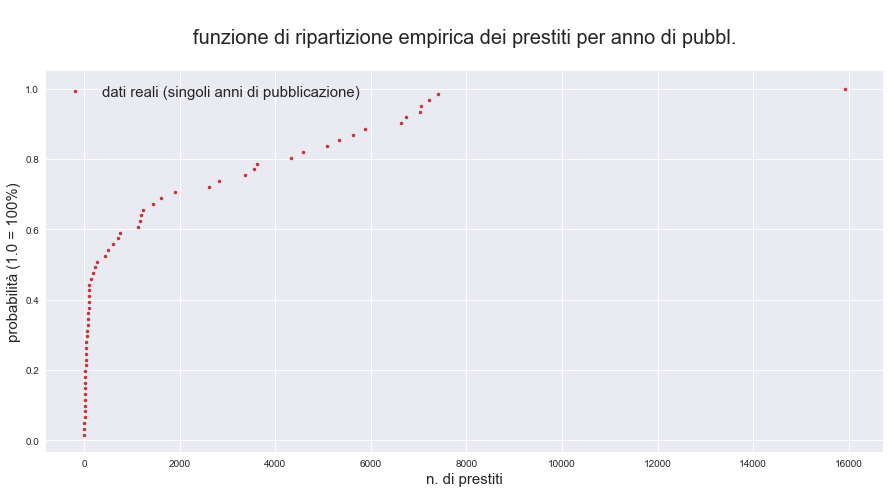

In [119]:
x_data,y_data = ecdf(x_['Movimenti'])

tau = np.mean(x['Movimenti'])
inter_x = np.random.exponential(tau,size=10000)
x_tau,y_tau = ecdf(inter_x)

plt.figure(figsize=(15,7))
plt.plot(x_data,y_data,marker='.', linestyle='none', label='dati reali (singoli anni di pubblicazione)')
#plt.plot(x_tau, y_tau, color='b', linewidth=5, label='funzione esponenziale teorica')
#plt.hist(inter_x, bins=int(np.sqrt(len(x))), density=True)
plt.title('\nfunzione di ripartizione empirica dei prestiti per anno di pubbl.\n', fontsize=20)
plt.xlabel('n. di prestiti', fontsize=15)
plt.ylabel('probabilità (1.0 = 100%)', fontsize=15)
plt.legend(fontsize=15)
plt.margins(0.05)
plt.show()

In [120]:
anno_pubblicazione = movimenti_giugno_ottobre_2017.copy()
anno_pubblicazione = anno_pubblicazione.where(anno_pubblicazione['Anno di pubblicazione'].apply(
    lambda x: str(x).isdigit()
))

anno_pubblicazione = anno_pubblicazione.groupby('Anno di pubblicazione').size().reset_index().rename(columns={0:'Movimenti'})
anno_pubblicazione = anno_pubblicazione.sort_values('Movimenti', ascending=False)

anno_pubblicazione = anno_pubblicazione.reset_index()
del anno_pubblicazione['index']
logging.info(' Totale annualità uniche nei titoli prestati: {}'.format(len(anno_pubblicazione)))

2018-07-26 09:32:49,561 INFO: Totale annualità uniche nei titoli prestati: 91


In [121]:
anno_pubblicazione.head()

,Anno di pubblicazione,Movimenti
0,2016,12898
1,2015,7035
2,2014,6033
3,2017,3254
4,2013,2449


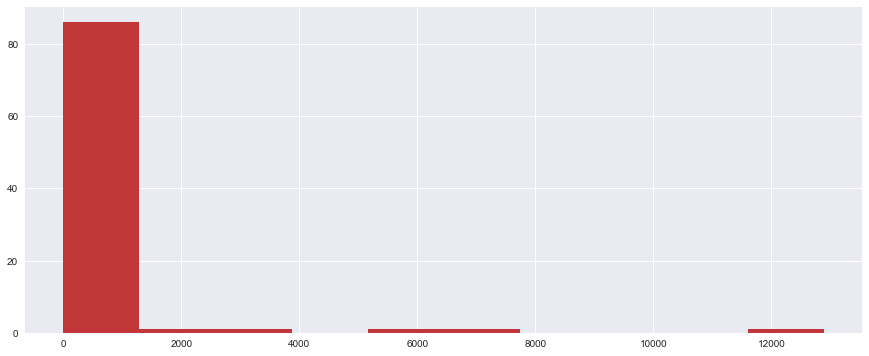

In [122]:
plt.figure(figsize=(15,6))
plt.hist(anno_pubblicazione['Movimenti'])
plt.show()

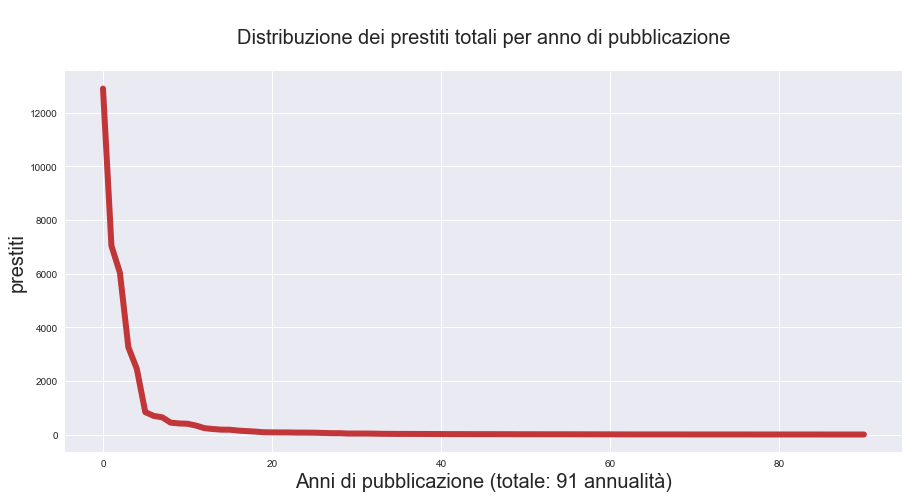

In [123]:
plt.figure(figsize=(15,7))
ap = np.asarray(anno_pubblicazione['Movimenti'])
plt.plot(ap, linewidth=6)
plt.title('\nDistribuzione dei prestiti totali per anno di pubblicazione\n', fontsize=20)
plt.xlabel('Anni di pubblicazione (totale: 91 annualità)', fontsize=20)
plt.ylabel('prestiti', fontsize=20)
plt.show()

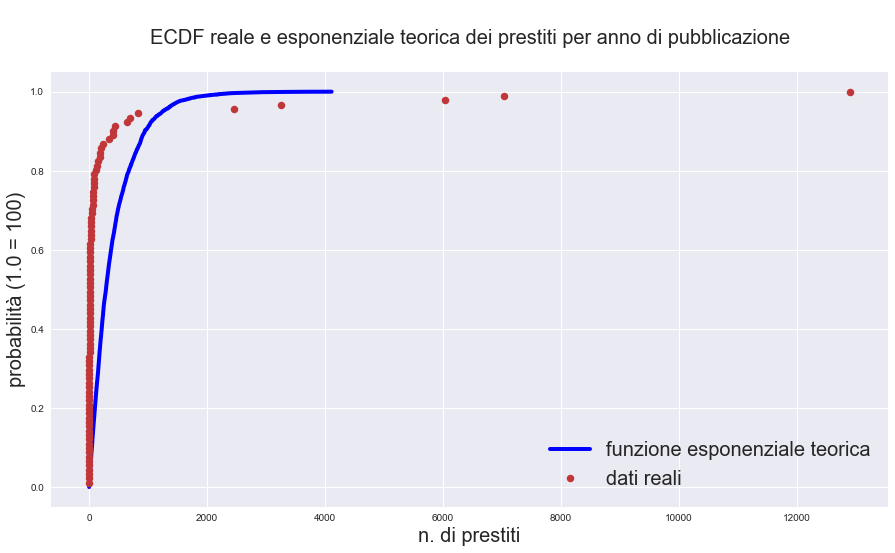

In [124]:
x_anno, y_anno = ecdf(anno_pubblicazione['Movimenti'])
plt.figure(figsize=(15,8))

tau = np.mean(anno_pubblicazione['Movimenti'])
exp_2 = np.random.exponential(tau, size=5000)
x_exp_2,y_exp_2 = ecdf(exp_2)
plt.plot(x_exp_2,y_exp_2, color='b', linewidth=4, label='funzione esponenziale teorica')
plt.plot(x_anno,y_anno, marker='.', linestyle='none', markersize=15, label='dati reali')
plt.title('\nECDF reale e esponenziale teorica dei prestiti per anno di pubblicazione\n', fontsize=20)
plt.xlabel('n. di prestiti', fontsize=20)
plt.ylabel('probabilità (1.0 = 100)', fontsize=20)
plt.legend(fontsize=20)
plt.show()

# Prestiti per biblioteca

In [125]:
movimenti_giugno_ottobre_2017.columns

Index(['Identificativo Titolo', 'Titolo', 'Cod. tipo materiale',
       'Tipo materiale', 'Cod. tipo documento', 'Tipo documento',
       'Cod. natura', 'Natura', 'Cod. tipo monografia', 'Tipo monografia',
       'Anno di pubblicazione', 'Cod. Lingua 1', 'Lingua 1', 'Cod. Paese',
       'Paese', 'Cod. tipo movimento', 'Tipo Movimento',
       'Data inizio movimento', 'Biblioteca movimento',
       'Cod. tipo utente movimento', 'Tipo utente movimento',
       'Eta' utente-movimento', 'Identificativo movimento'],
      dtype='object')

In [126]:
mov_biblioteche = movimenti_giugno_ottobre_2017.copy()
mov_biblioteche = mov_biblioteche.groupby('Biblioteca movimento').size().reset_index().rename(columns={0:'Movimenti'})
mov_biblioteche = mov_biblioteche.sort_values('Movimenti', ascending=False)
mov_biblioteche.head()

,Biblioteca movimento,Movimenti
22,BIBLIOTECA GUGLIELMO MARCONI,15376
12,BIBLIOTECA ENNIO FLAIANO,12162
11,BIBLIOTECA ELSA MORANTE,10804
10,BIBLIOTECA CORNELIA,10566
25,BIBLIOTECA NELSON MANDELA,10276


In [127]:
len(mov_biblioteche)

42

In [128]:
mov_biblioteche.describe()[3:]

,Movimenti
min,1.00
25%,1696.75
50%,6112.00
75%,7310.00
max,15376.00


In [129]:
mov_biblioteche['Movimenti'].sum()

222920

# Filtro biblioteche sopra 25 percentile movimenti

In [130]:
logging.info(' Totale biblioteche con movimenti nel periodo: {}'.format(len(mov_biblioteche['Biblioteca movimento'].unique())))
biblio_filtro = mov_biblioteche[mov_biblioteche['Movimenti'] > np.percentile( mov_biblioteche['Movimenti'], 25)]
logging.info(' Numero di biblioteche con prestiti sopra il 25 percentile: {}'.format(len(biblio_filtro)))

mov_biblioteche_max = (
    movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Biblioteca movimento'].isin(biblio_filtro['Biblioteca movimento'])]
)

2018-07-26 09:42:03,199 INFO: Totale biblioteche con movimenti nel periodo: 42
2018-07-26 09:42:03,201 INFO: Numero di biblioteche con prestiti sopra il 25 percentile: 31


In [131]:
[i for i in mov_biblioteche_max['Biblioteca movimento'].unique()]

['BIBLIOTECA GUGLIELMO MARCONI',
 'BIBLIOTECA CORNELIA',
 'BIBLIOTECA RAFFAELLO',
 'BIBLIOTECA GIORDANO BRUNO',
 'BIBLIOTECA CASA DEL PARCO',
 'BIBLIOTECA VALLE AURELIA',
 'BIBLIOTECA VACCHERIA NARDI',
 'BIBLIOTECA COLLI PORTUENSI',
 'BIBLIOTECA NELSON MANDELA',
 'BIBLIOTECA EUROPEA',
 'BIBLIOTECA SANDRO ONOFRI',
 'BIBLIOTECA ENNIO FLAIANO',
 'BIBLIOTECA CASA DEI BIMBI',
 'BIBLIOTECA RENATO NICOLINI',
 'BIBLIOTECA GALLINE BIANCHE',
 'TEATRO BIBLIOTECA QUARTICCIOLO',
 'BIBLIOTECA PENAZZATO',
 'BIBLIOTECA FRANCO BASAGLIA',
 'BIBLIOTECA GIANNI RODARI',
 'BIBLIOTECA LONGHENA',
 'BIBLIOTECA ENZO TORTORA',
 'BIBLIOTECA VILLA LEOPARDI',
 'BIBLIOTECA FLAMINIA',
 'BIBLIOTECA BORGHESIANA',
 'BIBLIOTECA ELSA MORANTE',
 'BIBLIOTECA CENTRALE PER RAGAZZI',
 'BIBLIOTECA PIER PAOLO PASOLINI',
 'BIBLIOTECA GOFFREDO MAMELI',
 'BIBLIOTECA VILLA MERCEDE',
 'BIBLIOTECA RUGANTINO',
 'COLLINA DELLA PACE']

In [132]:
logging.info(' Percentuale di prestiti sul totale delle biblioteche > 25. percentile: {}%\n'
             .format(int((len(mov_biblioteche_max) / mov_biblioteche['Movimenti'].sum()) * 100   )))
logging.info(' Lungheza dataset movimenti filtrato: {}'.format(len(mov_biblioteche_max)))

2018-07-26 09:42:08,238 INFO: Percentuale di prestiti sul totale delle biblioteche > 25. percentile: 97%

2018-07-26 09:42:08,239 INFO: Lungheza dataset movimenti filtrato: 216534


In [133]:
biblio_movimenti = (
    mov_biblioteche_max
    .groupby('Biblioteca movimento')
    .size()
    .reset_index()
    .rename(columns={0:'Movimenti'})
    .sort_values('Movimenti', ascending=False)
)

In [134]:
biblio_movimenti.head()

,Biblioteca movimento,Movimenti
16,BIBLIOTECA GUGLIELMO MARCONI,15376
7,BIBLIOTECA ENNIO FLAIANO,12162
6,BIBLIOTECA ELSA MORANTE,10804
5,BIBLIOTECA CORNELIA,10566
18,BIBLIOTECA NELSON MANDELA,10276


2018-07-26 09:42:14,986 WARNING:No handles with labels found to put in legend.


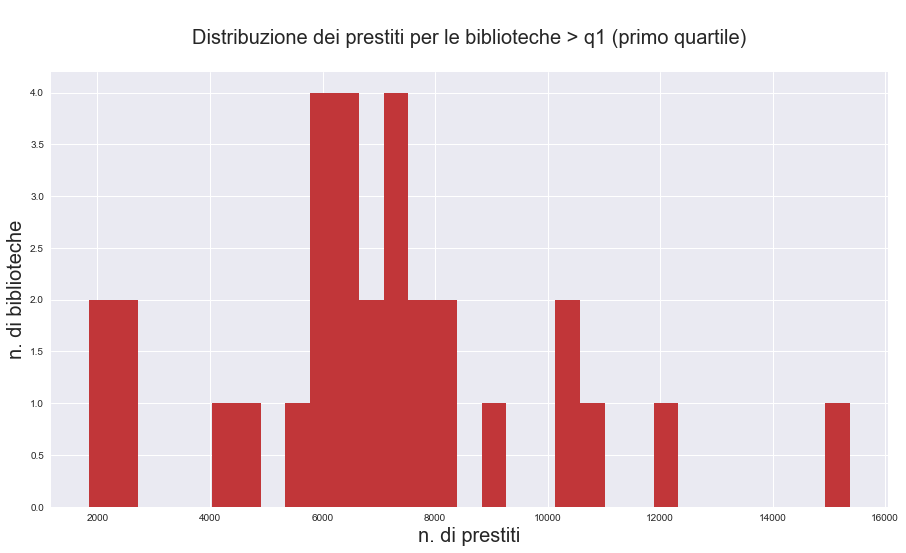

In [135]:
plt.figure(figsize=(15,8))
plt.hist(biblio_movimenti['Movimenti'], bins=len(biblio_movimenti))
plt.title('\nDistribuzione dei prestiti per le biblioteche > q1 (primo quartile)\n', fontsize=20)
plt.ylabel('n. di biblioteche', fontsize=20)
plt.xlabel('n. di prestiti', fontsize=20)
#plt.hist(np.random.normal(biblio_movimenti['Movimenti'].mean(),biblio_movimenti['Movimenti'].std(), 100), alpha=0.5)
plt.legend(fontsize=20)
plt.show()

In [136]:
biblio_movimenti['Movimenti'].std()

2901.9968238424035

In [137]:
biblio_movimenti['Movimenti'].mean()

6984.967741935484

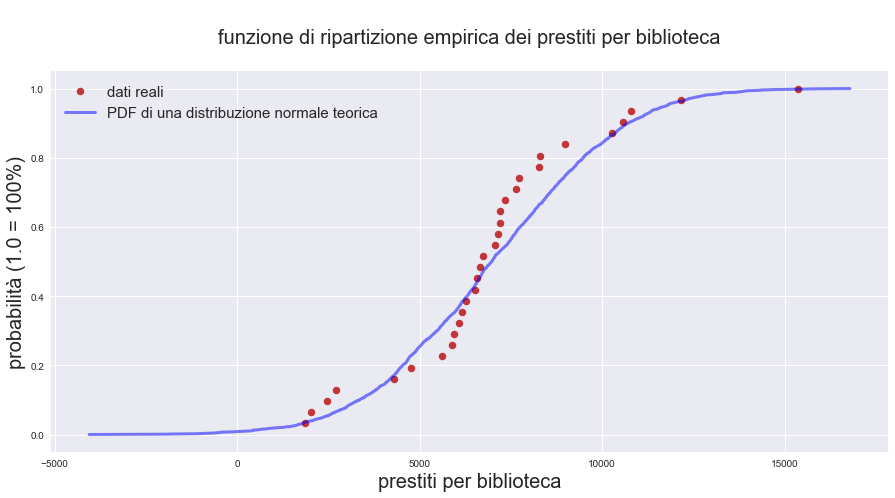

In [138]:
# ecdf 
plt.figure(figsize=(15,7))
x_biblio,y_biblio = ecdf(biblio_movimenti['Movimenti'])
plt.plot(x_biblio,y_biblio, marker='.', linestyle='none', markersize=15, label='dati reali')

norm_dist = np.random.normal(biblio_movimenti['Movimenti'].mean(),biblio_movimenti['Movimenti'].std(), size=3000)
x_norm,y_norm = ecdf(norm_dist)
plt.plot(x_norm,y_norm, color='b', alpha=0.5, linewidth=3, label='PDF di una distribuzione normale teorica')
plt.title('\nfunzione di ripartizione empirica dei prestiti per biblioteca\n', fontsize=20)
plt.ylabel('probabilità (1.0 = 100%)', fontsize=20)
plt.xlabel('prestiti per biblioteca', fontsize=20)
plt.legend(fontsize=15)

plt.show()

## Prestiti di titoli per anno di pubblicazione - biblioteche > 25. percentile movimenti

In [139]:
logging.info(' Lunghezza con anno di pubblicazione: {}'.format(len(anno_pubblicazione)))
anno_pubblicazione = mov_biblioteche_max[mov_biblioteche_max['Anno di pubblicazione'].notnull()]
logging.info(' Lunghezza con anno di pubblicazione: {}'.format(len(anno_pubblicazione)))

anno_pubblicazione['Anno di pubblicazione'] = anno_pubblicazione['Anno di pubblicazione'].astype(int)
anno_pubblicazione = anno_pubblicazione.groupby('Anno di pubblicazione').size().reset_index().rename(columns={0:'Movimenti'})
anno_pubblicazione = anno_pubblicazione.sort_values('Anno di pubblicazione', ascending=False)

anno_pubblicazione = anno_pubblicazione.reset_index()
del anno_pubblicazione['index']
logging.info(' Anni di pubblicazione: {}'.format(len(anno_pubblicazione)))

2018-07-26 10:01:40,776 INFO: Lunghezza con anno di pubblicazione: 91
2018-07-26 10:01:40,830 INFO: Lunghezza con anno di pubblicazione: 216392
2018-07-26 10:01:41,009 INFO: Anni di pubblicazione: 95


In [140]:
anno_pubblicazione.describe()[3:]

,Anno di pubblicazione,Movimenti
min,1887.0,1.0
25%,1946.5,4.5
50%,1970.0,253.0
75%,1993.5,3140.0
max,2017.0,18561.0


In [141]:
anno_pubblicazione.head()

,Anno di pubblicazione,Movimenti
0,2017,7690
1,2016,18561
2,2015,10382
3,2014,10187
4,2013,9679


In [142]:
anno_pubblicazione['Movimenti'].sum()

216392

In [143]:
anno_pubblicazione.index = anno_pubblicazione['Anno di pubblicazione']

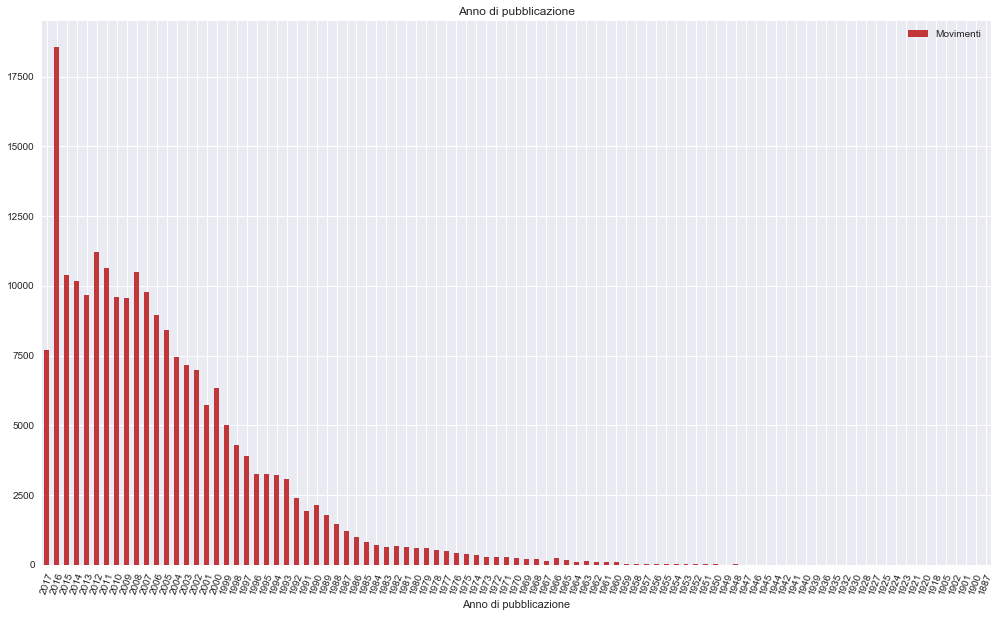

In [144]:
anno_pubblicazione[['Movimenti']].plot(kind='bar', figsize=(17,10), rot=70, fontsize=10, title='Anno di pubblicazione')
plt.show()

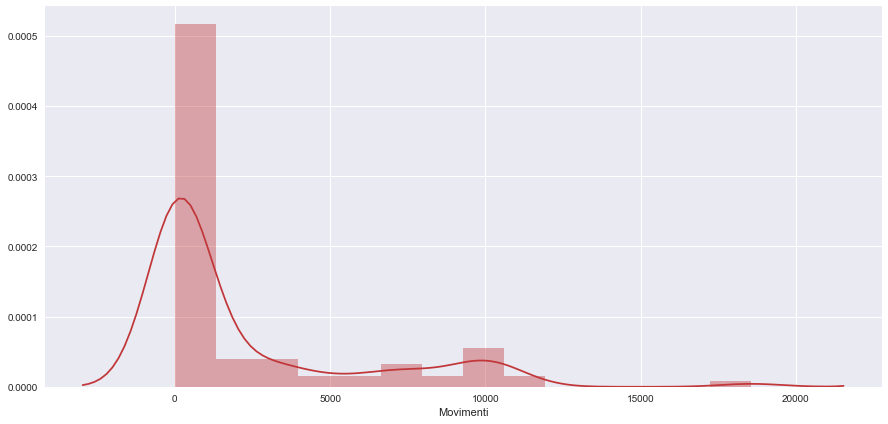

In [145]:
plt.figure(figsize=(15,7))
sns.distplot(anno_pubblicazione['Movimenti'])
plt.show()

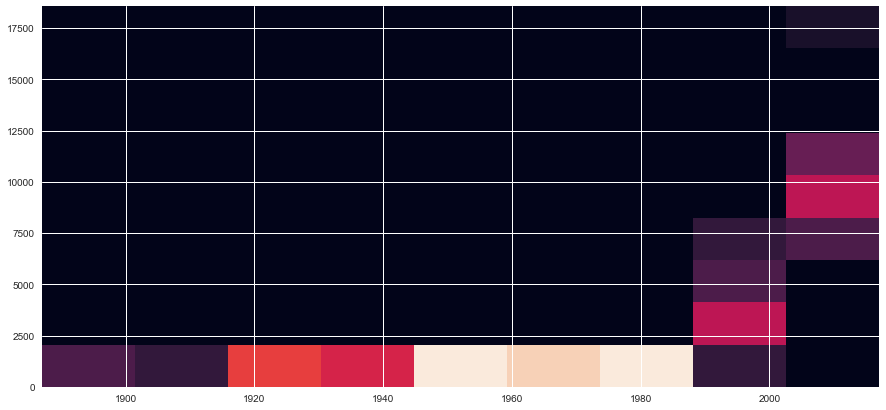

In [146]:

fig, ax = plt.subplots(figsize=(15,7))
x = anno_pubblicazione['Anno di pubblicazione']
y = anno_pubblicazione['Movimenti']
hist = ax.hist2d(x, y, bins=int(np.sqrt(len(anno_pubblicazione))))

# Indagine sui prestiti di titoli pubblicati nel 2016

In [150]:
logging.info(' Len mov totali: {}'.format(len(mov_biblioteche_max)))
mov_anno_pub_2016 = mov_biblioteche_max[mov_biblioteche_max['Anno di pubblicazione'].notnull()]
mov_anno_pub_2016['Anno di pubblicazione'] = mov_anno_pub_2016['Anno di pubblicazione'].astype(int)
mov_anno_pub_2016 = mov_anno_pub_2016[mov_anno_pub_2016['Anno di pubblicazione'] == 2016]
logging.info(' Len mov anno pubb. 2016: {}'.format(len(mov_anno_pub_2016)))
logging.info(' Titoli del 2016 prestati: {}'.format(len(mov_anno_pub_2016['Identificativo Titolo'].unique())))

2018-07-26 10:03:56,461 INFO: Len mov totali: 216534
2018-07-26 10:03:56,678 INFO: Len mov anno pubb. 2016: 18561
2018-07-26 10:03:56,680 INFO: Titoli del 2016 prestati: 3256


In [152]:
mov_anno_pub_2016.isnull().sum()

Identificativo Titolo         0   
Titolo                        0   
Cod. tipo materiale           0   
Tipo materiale                0   
Cod. tipo documento           0   
Tipo documento                0   
Cod. natura                   0   
Natura                        0   
Cod. tipo monografia          0   
Tipo monografia               0   
Anno di pubblicazione         0   
Cod. Lingua 1                 0   
Lingua 1                      0   
Cod. Paese                    0   
Paese                         0   
Cod. tipo movimento           0   
Tipo Movimento                0   
Data inizio movimento         0   
Biblioteca movimento          0   
Cod. tipo utente movimento    0   
Tipo utente movimento         0   
Eta' utente-movimento         2105
Identificativo movimento      0   
dtype: int64

In [153]:
mov_anno_pub_2016['Tipo Movimento'].value_counts()

Prestito esterno           16499
Prestito intersistemico    2044 
Consultazione              18   
Name: Tipo Movimento, dtype: int64

In [154]:
mov_anno_pub_2016 = mov_anno_pub_2016[mov_anno_pub_2016['Eta\' utente-movimento'].notnull()]
mov_anno_pub_2016['Eta\' utente-movimento'] = mov_anno_pub_2016['Eta\' utente-movimento'].astype(int)

### distribuzione delle età nei prestiti di titoli editi nel 2016

In [161]:
eta_mov_anno_pubb_2016 = (
    mov_anno_pub_2016[mov_anno_pub_2016['Eta\' utente-movimento'] < 100].groupby('Eta\' utente-movimento').size().reset_index().rename(columns={0:'Movimenti'}).sort_values('Eta\' utente-movimento')
)
eta_mov_anno_pubb_2016.head()

,Eta' utente-movimento,Movimenti
0,0,6
1,1,57
2,2,102
3,3,242
4,4,285


In [164]:
len([i for i in eta_mov_anno_pubb_2016['Eta\' utente-movimento'].unique()])

94

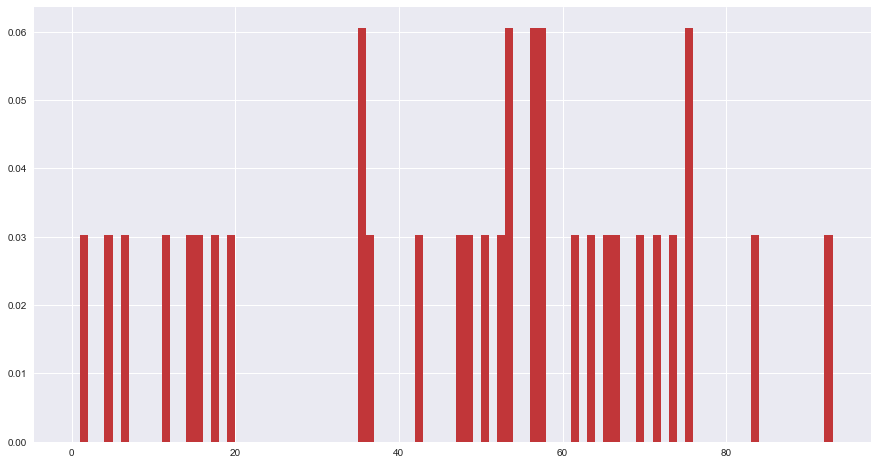

In [166]:
plt.figure(figsize=(15,8))
eta_mov_anno_pubb_2016.index = eta_mov_anno_pubb_2016['Eta\' utente-movimento']
bins = np.arange(0, len(eta_mov_anno_pubb_2016),1)
plt.hist(eta_mov_anno_pubb_2016['Movimenti'], bins=bins, density=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

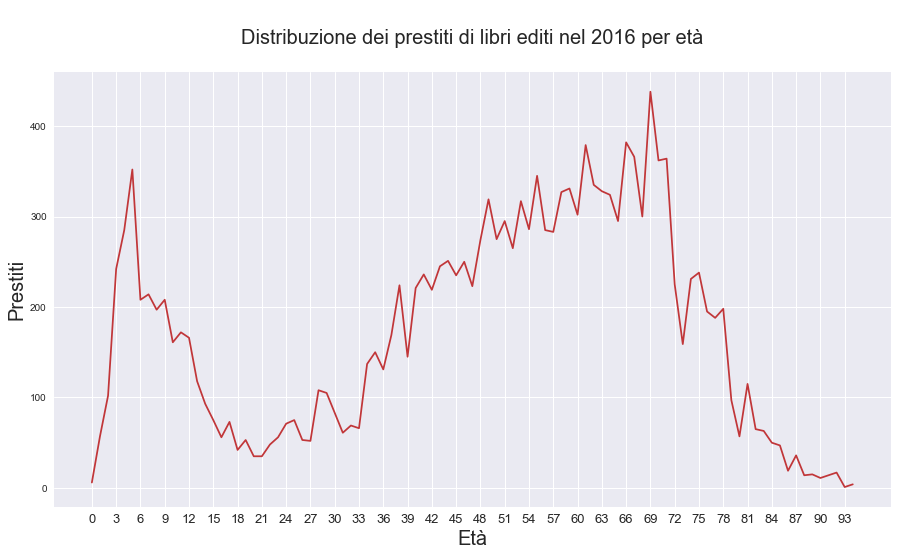

In [182]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(eta_mov_anno_pubb_2016.index, eta_mov_anno_pubb_2016['Movimenti'], label='prestiti')
plt.title('\nDistribuzione dei prestiti di libri editi nel 2016 per età\n', fontsize=20)
ax.xaxis.set_ticks(np.arange(0, len(eta_mov_anno_pubb_2016), 3))
plt.xticks(fontsize=13)
plt.xlabel('Età', fontsize=20)
plt.ylabel('Prestiti', fontsize=20)
plt.show

In [196]:
eta_mov_anno_pubb_2016[['Movimenti']].describe()[3:]

,Movimenti
min,1.00
25%,63.50
50%,170.50
75%,274.75
max,438.00


In [185]:
np.sum(eta_mov_anno_pubb_2016['Movimenti'] > 1)

93

In [193]:
x = eta_mov_anno_pubb_2016[eta_mov_anno_pubb_2016['Movimenti'] > np.percentile(eta_mov_anno_pubb_2016['Movimenti'], 50)]
np.sum(x['Movimenti'])

13034

In [197]:
x['Eta\' utente-movimento'].values

array([ 3,  4,  5,  6,  7,  8,  9, 11, 38, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78])

In [207]:
z = mov_anno_pub_2016[mov_anno_pub_2016['Eta\' utente-movimento'].isin(x['Eta\' utente-movimento'])]
z['count'] = 1
logging.info(' Totale prestiti per età sopra il 50. percentile (mediana): {}'.format(len(z)))
logging.info(' Peso sul totale di z: {}%'.format( np.round((len(z)/len(mov_anno_pub_2016) * 100),2 ) ))

2018-07-26 10:55:31,348 INFO: Totale prestiti per età sopra il 50. percentile (mediana): 13034
2018-07-26 10:55:31,349 INFO: Peso sul totale di z: 79.21%


In [206]:
z.columns

Index(['Identificativo Titolo', 'Titolo', 'Cod. tipo materiale',
       'Tipo materiale', 'Cod. tipo documento', 'Tipo documento',
       'Cod. natura', 'Natura', 'Cod. tipo monografia', 'Tipo monografia',
       'Anno di pubblicazione', 'Cod. Lingua 1', 'Lingua 1', 'Cod. Paese',
       'Paese', 'Cod. tipo movimento', 'Tipo Movimento',
       'Data inizio movimento', 'Biblioteca movimento',
       'Cod. tipo utente movimento', 'Tipo utente movimento',
       'Eta' utente-movimento', 'Identificativo movimento'],
      dtype='object')

In [214]:
z.groupby(['Identificativo Titolo','Titolo'])['count'].sum().reset_index().rename(columns={'count':'Prestiti'}).sort_values('Prestiti', ascending=False).head(20)

,Identificativo Titolo,Titolo,Prestiti
1653,823950,"Le *otto montagne / Paolo Cognetti. - Torino : Einaudi, 2016. - 199 p. ; 22 cm.",172
602,811765,"*Magnifica / Maria Rosaria Valentini. - Palermo : Sellerio, 2016. - 268 p. ; 21 cm",126
1821,825236,"*Cleopatra va in prigione / Claudia Durastanti. - Roma : Minimum fax, 2016. - 129 p. ; 21 cm",124
652,812200,"*Serenata senza nome : notturno per il commissario Ricciardi / Maurizio De Giovanni. - Torino : Einaudi, 2016. - 373 p. ; 22 cm.",110
742,813221,"*7-7-2007 / Antonio Manzini. - Palermo : Sellerio, 2016. - 369 p. ; 17 cm",109
1436,821907,"L'*estate fredda / Gianrico Carofiglio. - Torino : Einaudi, 2016. - 340 p. ; 22 cm",105
1784,824924,"*Pane : per i Bastardi di Pizzofalcone / Maurizio De Giovanni. - Torino : Einaudi, 2016. - 331 p. ; 22 cm",103
2483,853239,"*Tutti i bambini devono essere felici : storia di un maestro e della sua scuola / Antonella Meiani. - Milano : Terre di mezzo, 2016. - 150 p. : ill. ; 21 cm",100
352,808586,"*Caffè amaro / Simonetta Agnello Hornby. - Milano : Feltrinelli, 2016. - 348 p. ; 23 cm.",94
58,801199,"*Cinque indagini romane per Rocco Schiavone / Antonio Manzini. - Palermo : Sellerio, 2016. - 244 p. ; 17 cm. ((Contiene: L'accattone, Le ferie di agosto, Buon Natale ...",88


In [215]:
titoli_2016 = mov_anno_pub_2016.groupby('Identificativo Titolo').size().reset_index().rename(columns={0:'Movimenti'})
titoli_2016 = titoli_2016.sort_values('Movimenti', ascending=False)
titoli_2016 = (
    titoli_2016.merge(mov_anno_pub_2016[['Identificativo Titolo','Titolo']].drop_duplicates('Identificativo Titolo'),
                      left_on='Identificativo Titolo',
                     right_on='Identificativo Titolo',
                     how='left')
)
titoli_2016.head(20)

,Identificativo Titolo,Movimenti,Titolo
0,823950,202,"Le *otto montagne / Paolo Cognetti. - Torino : Einaudi, 2016. - 199 p. ; 22 cm."
1,825236,145,"*Cleopatra va in prigione / Claudia Durastanti. - Roma : Minimum fax, 2016. - 129 p. ; 21 cm"
2,811765,141,"*Magnifica / Maria Rosaria Valentini. - Palermo : Sellerio, 2016. - 268 p. ; 21 cm"
3,812200,123,"*Serenata senza nome : notturno per il commissario Ricciardi / Maurizio De Giovanni. - Torino : Einaudi, 2016. - 373 p. ; 22 cm."
4,813221,120,"*7-7-2007 / Antonio Manzini. - Palermo : Sellerio, 2016. - 369 p. ; 17 cm"
5,821907,119,"L'*estate fredda / Gianrico Carofiglio. - Torino : Einaudi, 2016. - 340 p. ; 22 cm"
6,824924,114,"*Pane : per i Bastardi di Pizzofalcone / Maurizio De Giovanni. - Torino : Einaudi, 2016. - 331 p. ; 22 cm"
7,853239,114,"*Tutti i bambini devono essere felici : storia di un maestro e della sua scuola / Antonella Meiani. - Milano : Terre di mezzo, 2016. - 150 p. : ill. ; 21 cm"
8,808586,105,"*Caffè amaro / Simonetta Agnello Hornby. - Milano : Feltrinelli, 2016. - 348 p. ; 23 cm."
9,823497,104,"La *paranza dei bambini : romanzo / Roberto Saviano. - Milano : Feltrinelli, 2016. - 347 p. ; 23 cm."


In [216]:
titoli_2016['Movimenti'].sum()

16456

# Relazione tra posseduto e prestiti

In [223]:
logging.info(' Totale biblioteche con movimenti nel periodo: {}'.format(len(mov_biblioteche['Biblioteca movimento'].unique())))
biblio_filtro = mov_biblioteche[mov_biblioteche['Movimenti'] > np.percentile( mov_biblioteche['Movimenti'], 25)]
logging.info(' Numero di biblioteche con prestiti sopra il 25 percentile: {}'.format(len(biblio_filtro)))

mov_biblioteche_max = (
    movimenti_giugno_ottobre_2017[movimenti_giugno_ottobre_2017['Biblioteca movimento'].isin(biblio_filtro['Biblioteca movimento'])]
)

2018-07-26 11:31:40,750 INFO: Totale biblioteche con movimenti nel periodo: 42
2018-07-26 11:31:40,752 INFO: Numero di biblioteche con prestiti sopra il 25 percentile: 31


In [232]:
mov_biblioteche_max['mese'] = mov_biblioteche_max.index.month
mov_biblioteche_max['mese'] = mov_biblioteche_max['mese'].apply(lambda x: calendar.month_abbr[x])
mov_biblioteche_max['count'] = 1
mov_biblioteche_max.head(1)


,Identificativo Titolo,Titolo,Cod. tipo materiale,Tipo materiale,Cod. tipo documento,Tipo documento,Cod. natura,Natura,Cod. tipo monografia,Tipo monografia,Anno di pubblicazione,Cod. Lingua 1,Lingua 1,Cod. Paese,Paese,Cod. tipo movimento,Tipo Movimento,Data inizio movimento,Biblioteca movimento,Cod. tipo utente movimento,Tipo utente movimento,Eta' utente-movimento,Identificativo movimento,mese,count
Data inizio movimento,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-01,223816,"La *foresta dei pigmei / Isabel Allende ; traduzione di Elena Liverani. - Milano : Feltrinelli, 2004. - 189 p. ; 23 cm.",M,Libro moderno,LM,Testo a stampa (moderno),M,Monografia,U,Uniche,2004,ITA,ITALIANO,IT,ITALIA,PE,Prestito esterno,2017-06-01,BIBLIOTECA GUGLIELMO MARCONI,LA,LAVORATORE AUTONOMO E COADIUV.,12.0,14401583,Jun,1


In [239]:
prest_mese_biblio_max = mov_biblioteche_max.groupby(['Biblioteca movimento','mese'])['count'].sum().reset_index()


prest_mese_biblio_max = pd.pivot_table(prest_mese_biblio_max, values='count',index='Biblioteca movimento', columns='mese', aggfunc='sum')
cols = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct']
prest_mese_biblio_max = prest_mese_biblio_max[cols].reset_index()
prest_mese_biblio_max.head()

mese,Biblioteca movimento,Jun,Jul,Aug,Sep,Oct
0,BIBLIOTECA BORGHESIANA,554.0,543.0,373.0,473.0,518.0
1,BIBLIOTECA CASA DEI BIMBI,1537.0,1411.0,433.0,1855.0,2398.0
2,BIBLIOTECA CASA DEL PARCO,350.0,390.0,114.0,494.0,504.0
3,BIBLIOTECA CENTRALE PER RAGAZZI,1239.0,1394.0,418.0,1527.0,1698.0
4,BIBLIOTECA COLLI PORTUENSI,1471.0,1656.0,1010.0,1626.0,1439.0


In [241]:
# posseduto biblioteche filtrato corrispondente alle biblio nei prestiti > 25. percentile
sett_2017_poss = (
    posseduto_sett_2017_mag_2018[posseduto_sett_2017_mag_2018['Biblioteca inventario']
                                 .isin(mov_biblioteche_max['Biblioteca movimento'])]
)

In [242]:
sett_2017_poss.head()

Mese,Biblioteca inventario,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May
4,BIBLIOTECA BORGHESIANA,9854.0,9873.0,9916.0,9924.0,9946.0,9956.0,9973.0,10087.0,10101.0
5,BIBLIOTECA CASA DEI BIMBI,10254.0,10260.0,10293.0,10295.0,10302.0,10302.0,10262.0,10296.0,10416.0
6,BIBLIOTECA CASA DEL PARCO,8577.0,8595.0,8608.0,8646.0,8683.0,8712.0,8743.0,8805.0,8857.0
9,BIBLIOTECA CENTRALE PER RAGAZZI,30976.0,31010.0,31045.0,31064.0,31064.0,31107.0,31136.0,31201.0,30718.0
10,BIBLIOTECA COLLI PORTUENSI,26348.0,26455.0,26514.0,26565.0,26622.0,26642.0,26709.0,26759.0,26818.0


## filtro con solo il mese di ottobre

In [245]:
# raw settembre prestiti
sett_2017_prest = mov_biblioteche_max.copy()
sett_2017_prest = sett_2017_prest[['Biblioteca movimento','mese']][sett_2017_prest['mese'] == 'Oct']
sett_2017_prest = sett_2017_prest.groupby('Biblioteca movimento').size().reset_index().rename(columns={0:'Prestiti'})
print(len(sett_2017_prest))
sett_2017_prest.head(2)

30


,Biblioteca movimento,Prestiti
0,BIBLIOTECA BORGHESIANA,518
1,BIBLIOTECA CASA DEI BIMBI,2398


In [ ]:
# riallineare le biblioteche nei 2 dataset per settembre

In [246]:
sett_2017_poss = (
    sett_2017_poss[sett_2017_poss['Biblioteca inventario']
                   .isin(sett_2017_prest['Biblioteca movimento'])]
)
len(sett_2017_poss)

30

In [247]:
df_finale_sett_2017 = sett_2017_poss.merge(sett_2017_prest, left_on='Biblioteca inventario', right_on='Biblioteca movimento', how='left')
df_finale_sett_2017 = (
    df_finale_sett_2017[['Biblioteca movimento','Oct','Prestiti']]
    .rename(columns={'Biblioteca movimento':'Biblioteca','Oct':'Catalogo'})
)
df_finale_sett_2017['Catalogo'] = df_finale_sett_2017['Catalogo'].astype(int)
df_finale_sett_2017.head()

,Biblioteca,Catalogo,Prestiti
0,BIBLIOTECA BORGHESIANA,9873,518
1,BIBLIOTECA CASA DEI BIMBI,10260,2398
2,BIBLIOTECA CASA DEL PARCO,8595,504
3,BIBLIOTECA CENTRALE PER RAGAZZI,31010,1698
4,BIBLIOTECA COLLI PORTUENSI,26455,1439


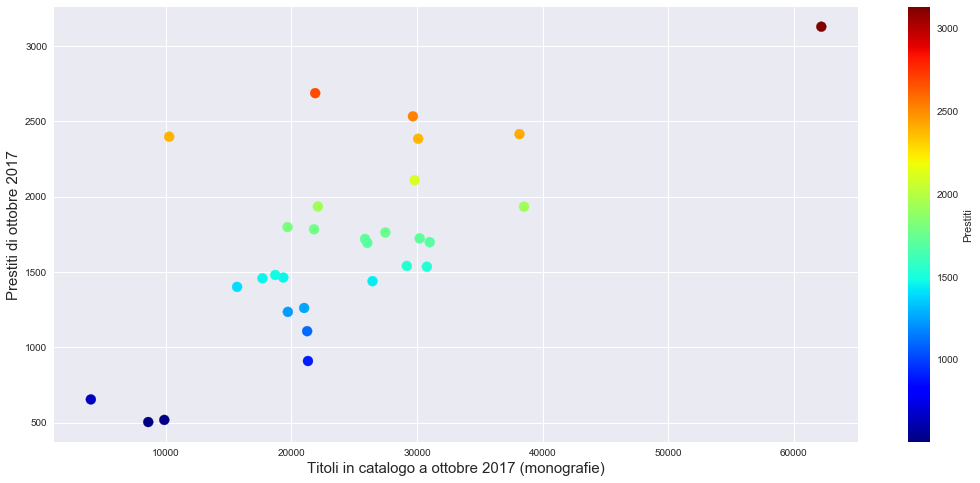

In [253]:
plt.figure(figsize=(18,8))
plt.scatter(df_finale_sett_2017['Catalogo'].astype(float),
            df_finale_sett_2017['Prestiti'].astype(float),
            c=df_finale_sett_2017['Prestiti'].astype(float),
            cmap="jet", s=100)
plt.ylabel('Prestiti di ottobre 2017', fontsize=15)
plt.xlabel('Titoli in catalogo a ottobre 2017 (monografie)', fontsize=15)
#plt.legend(fontsize=15)
plt.colorbar(label="Prestiti")
plt.show()

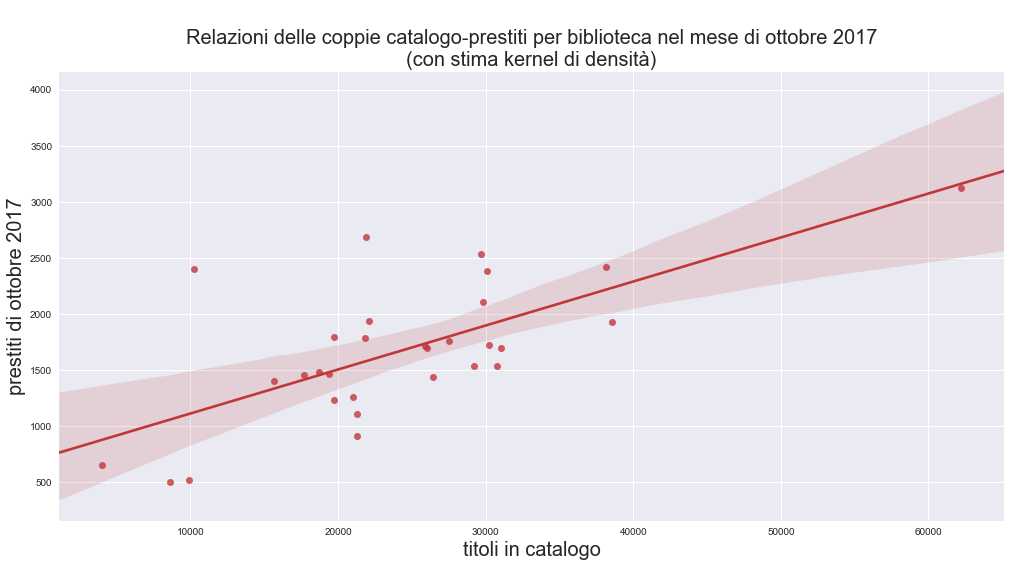

In [260]:
sns.pairplot(data=df_finale_sett_2017, x_vars='Catalogo', y_vars='Prestiti', size=7, aspect=2, kind='reg')
plt.title('\nRelazioni delle coppie catalogo-prestiti per biblioteca nel mese di ottobre 2017\n(con stima kernel di densità)', fontsize=20)
plt.xlabel(s='titoli in catalogo', fontsize=20)
plt.ylabel(s='prestiti di ottobre 2017', fontsize=20)
plt.show()

In [ ]:
"""
df_finale_sett_2017.plot(kind='scatter', x='Catalogo', y='Prestiti', fontsize=15, figsize=(15,7), s=100, c='Prestiti',
                        cmap=plt.get_cmap("jet"), colorbar=True)
plt.xlabel("Titoli in catalogo")
plt.show()
"""

# Regressione lineare

In [261]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X = np.array(df_finale_sett_2017['Catalogo'])[:, np.newaxis] # https://stackoverflow.com/questions/29462108/sklearn-linear-regression-x-and-y-input-format
y = np.array(df_finale_sett_2017['Prestiti'])[:, np.newaxis]
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [262]:
model.score(X,y)

0.4721855518173428

# Validazione regressione linear

In [263]:
print(model.coef_, model.intercept_)

[[0.03923012]] [720.77558697]


In [264]:
logging.info(' Solo il {}% della variabilità dei prestiti (y) può essere spiegato con il numero dei titoli in catalogo (X)'.format(np.around(model.score(X,y), decimals=4)*100))

2018-07-26 12:08:05,444 INFO: Solo il 47.22% della variabilità dei prestiti (y) può essere spiegato con il numero dei titoli in catalogo (X)


In [265]:
model.predict(df_finale_sett_2017['Catalogo'].iloc[:][:, np.newaxis])

array([[1108.0945923 ],
       [1123.27664993],
       [1057.95849498],
       [1937.30170417],
       [1758.60849347],
       [1885.00795009],
       [2217.91477468],
       [1579.56221166],
       [1545.03970334],
       [1735.3842606 ],
       [1798.85859977],
       [2232.11607924],
       [1493.21671073],
       [1890.4609372 ],
       [1479.917699  ],
       [1575.95304034],
       [3160.92847365],
       [1335.51161588],
       [1901.36691142],
       [1454.88888046],
       [1928.47492648],
       [1554.41570276],
       [1587.99668813],
       [1556.96566076],
       [1905.99606594],
       [1742.40645263],
       [1865.86365001],
       [1414.79569466],
       [ 878.59837219],
       [1494.11900356]])

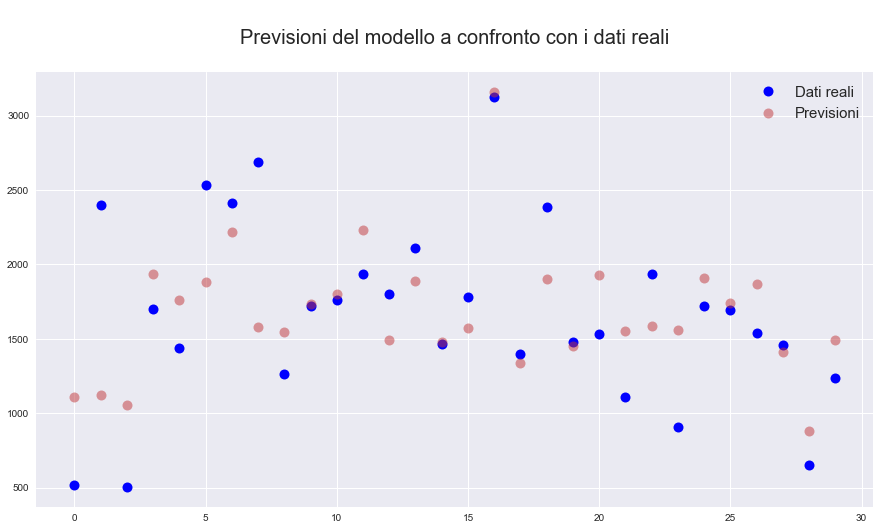

In [267]:
plt.figure(figsize=(15,8))
plt.plot(df_finale_sett_2017['Prestiti'], linestyle='none', marker='.', c='b', markersize=20, label='Dati reali')
plt.plot(model.predict(df_finale_sett_2017['Catalogo'].iloc[:][:, np.newaxis]), linestyle='none', marker='.', markersize=20, label='Previsioni', alpha=0.5)
plt.title('\nPrevisioni del modello a confronto con i dati reali\n', fontsize=20)
plt.legend(fontsize=15)

# K-neighbors regressor

In [268]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors=3)
X = np.array(df_finale_sett_2017['Catalogo'])[:, np.newaxis] # https://stackoverflow.com/questions/29462108/sklearn-linear-regression-x-and-y-input-format
y = np.array(df_finale_sett_2017['Prestiti'])[:, np.newaxis]
model.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [269]:
model.score(X,y)

0.6119334932690346

# Validazione regressione con K-Nearest Neighbors

In [270]:
logging.info(' Solo il {}% della variabilità dei prestiti (y) può essere spiegato con il numero dei titoli in catalogo (X)'.format(np.around(model.score(X,y), decimals=4)*100))

2018-07-26 12:30:10,370 INFO: Solo il 61.19% della variabilità dei prestiti (y) può essere spiegato con il numero dei titoli in catalogo (X)


In [271]:
model.predict(df_finale_sett_2017['Catalogo'].iloc[:][:, np.newaxis])

array([[1140.        ],
       [1140.        ],
       [1140.        ],
       [1652.        ],
       [1617.        ],
       [2342.        ],
       [2015.33333333],
       [2134.66666667],
       [1092.33333333],
       [1617.        ],
       [1631.33333333],
       [2015.33333333],
       [1498.66666667],
       [2342.        ],
       [1498.66666667],
       [2134.66666667],
       [2492.        ],
       [1446.33333333],
       [2072.        ],
       [1580.33333333],
       [1652.        ],
       [1092.33333333],
       [2134.66666667],
       [1092.33333333],
       [2072.        ],
       [1617.        ],
       [2060.66666667],
       [1467.        ],
       [ 558.66666667],
       [1498.66666667]])

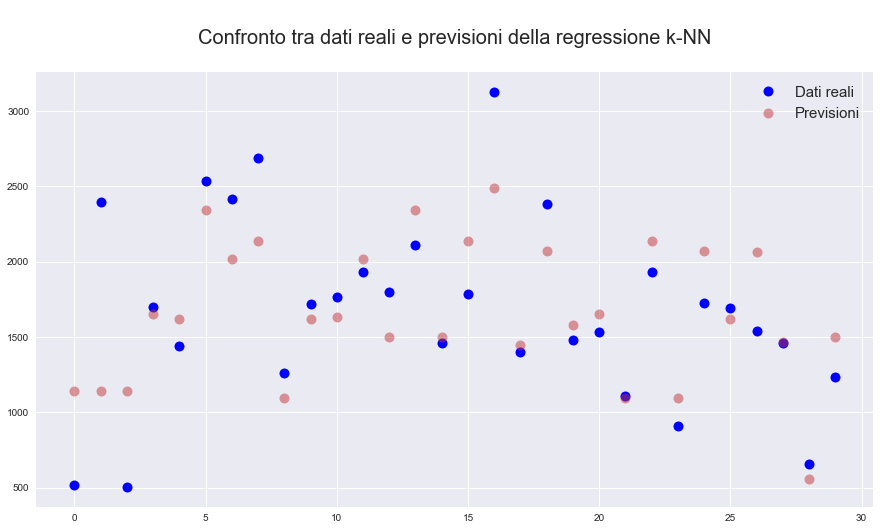

In [274]:
plt.figure(figsize=(15,8))
plt.plot(df_finale_sett_2017['Prestiti'], linestyle='none', marker='.', c='b', markersize=20, label='Dati reali')
plt.plot(model.predict(df_finale_sett_2017['Catalogo'].iloc[:][:, np.newaxis]), linestyle='none', marker='.', markersize=20, label='Previsioni', alpha=0.5)

plt.legend(fontsize=15)
plt.title('\nConfronto tra dati reali e previsioni della regressione k-NN\n', fontsize=20)
plt.show()

# Prestiti per fascia di età

In [275]:
len(mov_biblioteche_max)

216534

In [276]:
mov_biblioteche_max.index[0]

Timestamp('2017-06-01 00:00:00')

In [277]:
mov_biblioteche_max.index[-1]

Timestamp('2017-10-31 00:00:00')

In [278]:
logging.info(' Lunghezza prestiti con valori età nulli: {}'.format(len(mov_biblioteche_max)))
prestiti_per_eta = mov_biblioteche_max[mov_biblioteche_max['Eta\' utente-movimento'].notnull()]
prestiti_per_eta['Eta\' utente-movimento'] = prestiti_per_eta['Eta\' utente-movimento'].astype(int)
logging.info(' Lunghezza prestiti senza età nulli: {}'.format(len(prestiti_per_eta)))

2018-07-26 12:47:32,264 INFO: Lunghezza prestiti con valori età nulli: 216534
2018-07-26 12:47:32,352 INFO: Lunghezza prestiti senza età nulli: 194576


In [279]:
prestiti_per_eta[['Eta\' utente-movimento']].describe()[3:]

,Eta' utente-movimento
min,0.0
25%,18.0
50%,43.0
75%,60.0
max,1046.0


# errori nel campo età

In [282]:
prestiti_per_eta[['Identificativo Titolo','Data inizio movimento','Eta\' utente-movimento']][prestiti_per_eta['Eta\' utente-movimento']  > 100]

,Identificativo Titolo,Data inizio movimento,Eta' utente-movimento
Data inizio movimento,,,
2017-06-07,67375,2017-06-07,967
2017-06-07,389158,2017-06-07,967
2017-06-10,340198,2017-06-10,996
2017-06-10,255191,2017-06-10,996
2017-06-10,327930,2017-06-10,996
2017-06-10,121117,2017-06-10,996
2017-06-14,196024,2017-06-14,823
2017-06-15,252301,2017-06-15,996
2017-06-15,360691,2017-06-15,996


In [280]:
len(prestiti_per_eta[prestiti_per_eta['Eta\' utente-movimento']  > 100])

25

# filtro senza errori

In [283]:
logging.info(' Prestiti con tutte le età compresi i valori errati: {}'.format(len(prestiti_per_eta)))
prestiti_per_eta = prestiti_per_eta[(prestiti_per_eta['Eta\' utente-movimento'] >= 6) & (prestiti_per_eta['Eta\' utente-movimento'] < 100) ]
logging.info(' Prestiti con età 6+ (range ISTAT): {}'.format(len(prestiti_per_eta)))

2018-07-26 13:01:44,693 INFO: Prestiti con tutte le età compresi i valori errati: 194576
2018-07-26 13:01:44,747 INFO: Prestiti con età 6+ (range ISTAT): 180119


In [284]:
tabella_eta = prestiti_per_eta.groupby('Eta\' utente-movimento').size().reset_index().rename(columns={0:'Movimenti'})
tabella_eta.head()

,Eta' utente-movimento,Movimenti
0,6,3570
1,7,3944
2,8,3756
3,9,4020
4,10,3491


In [285]:
# colonna con fasce di età

'''
# età ISTAT: https://www.istat.it/it/archivio/213851
6-10
11-14
15-17
18-19
20-24
25-34
35-44
45-54
55-59
60-64
65-74
75 e più
'''

criteri = [tabella_eta['Eta\' utente-movimento'].between(6, 10), tabella_eta['Eta\' utente-movimento'].between(11, 14),
           tabella_eta['Eta\' utente-movimento'].between(15, 17), tabella_eta['Eta\' utente-movimento'].between(18, 19),
           tabella_eta['Eta\' utente-movimento'].between(20, 24), tabella_eta['Eta\' utente-movimento'].between(25, 34),
           tabella_eta['Eta\' utente-movimento'].between(35, 44), tabella_eta['Eta\' utente-movimento'].between(45, 54),
           tabella_eta['Eta\' utente-movimento'].between(55, 59), tabella_eta['Eta\' utente-movimento'].between(60, 64),
           tabella_eta['Eta\' utente-movimento'].between(65, 74), tabella_eta['Eta\' utente-movimento'].between(75, 100)]

valori = ['6-10', '11-14','15-17','18-19','20-24','25-34','35-44','45-54','55-59','60-64','65-74','75+']

tabella_eta['Fasce di età'] = np.select(criteri, valori)

In [286]:
tabella_eta.head()

,Eta' utente-movimento,Movimenti,Fasce di età
0,6,3570,6-10
1,7,3944,6-10
2,8,3756,6-10
3,9,4020,6-10
4,10,3491,6-10


In [287]:
tabella_eta.describe()

,Eta' utente-movimento,Movimenti
count,92.000000,92.000000
mean,51.510870,1957.815217
std,26.720982,1071.140441
min,6.000000,1.000000
25%,28.750000,1416.500000
50%,51.500000,1988.000000
75%,74.250000,2772.500000
max,98.000000,4020.000000


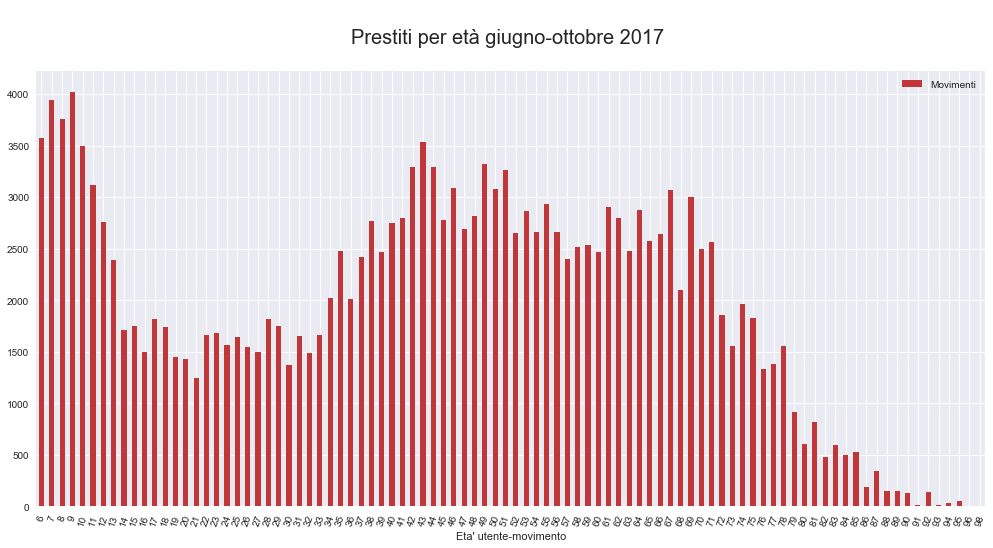

In [289]:
eta_plot = tabella_eta[['Eta\' utente-movimento','Movimenti']]
eta_plot.index = eta_plot['Eta\' utente-movimento']
eta_plot[['Movimenti']].plot(kind='bar', figsize=(17,8), rot=70, fontsize=10)
plt.title('\nPrestiti per età giugno-ottobre 2017 \n', fontsize=20)
plt.show()

### distribuzione con le fasce istat

In [290]:
fasce_istat = (
    tabella_eta.groupby('Fasce di età')['Movimenti'].sum().reset_index()
)

fasce_istat = (
    fasce_istat.merge(tabella_eta[['Eta\' utente-movimento','Fasce di età']].drop_duplicates('Fasce di età'), left_on='Fasce di età',right_on='Fasce di età', how='left')
    .sort_values('Eta\' utente-movimento')
)

fasce_istat

,Fasce di età,Movimenti,Eta' utente-movimento
8,6-10,18781,6
0,11-14,9973,11
1,15-17,5056,15
2,18-19,3183,18
3,20-24,7582,20
4,25-34,16423,25
5,35-44,27795,35
6,45-54,29212,45
7,55-59,13045,55
9,60-64,13534,60


In [291]:
fasce_istat['Movimenti'].sum()

180119

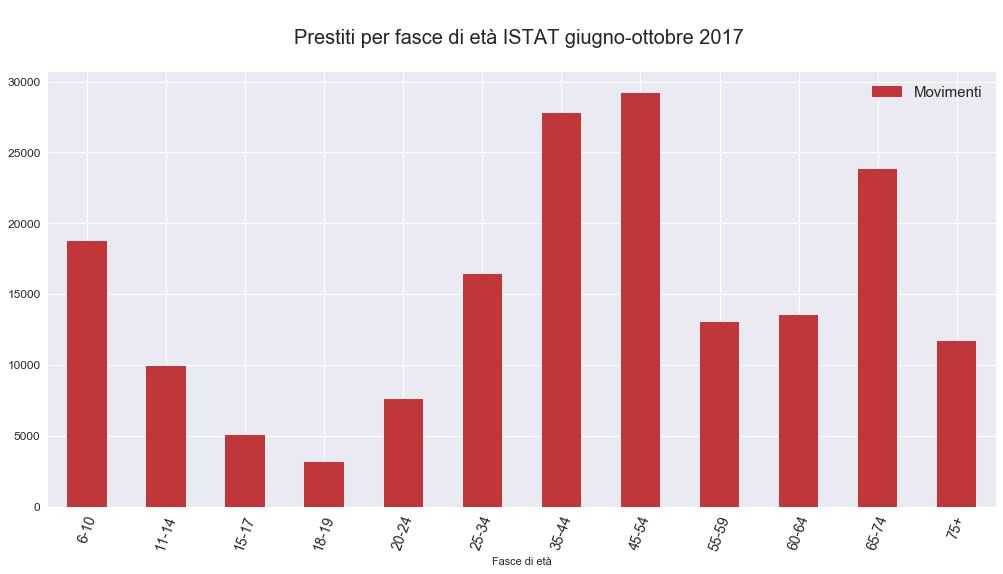

In [293]:
istat_eta_plot = fasce_istat[['Fasce di età','Movimenti']]
istat_eta_plot.index = istat_eta_plot['Fasce di età']
istat_eta_plot[['Movimenti']].plot(kind='bar', figsize=(17,8), rot=70, fontsize=12)
plt.title('\nPrestiti per fasce di età ISTAT giugno-ottobre 2017 \n', fontsize=20)
plt.xticks(fontsize=14)
plt.legend(fontsize=15)
plt.show()

# ECDF prestiti per età

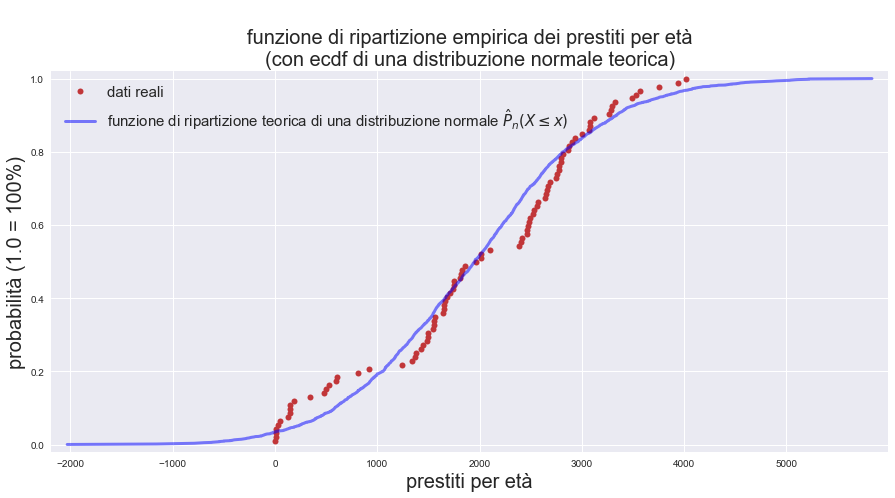

In [298]:
# distribuzione prestiti per età
x_età,y_eta = ecdf(tabella_eta['Movimenti'])
plt.figure(figsize=(15,7))
plt.plot(x_età, y_eta, marker='.', linestyle='none', label='dati reali', markersize=12)

norm_dist = np.random.normal(tabella_eta['Movimenti'].mean(),tabella_eta['Movimenti'].std(), size=3000)
x_norm,y_norm = ecdf(norm_dist)
plt.plot(x_norm,y_norm, color='b', alpha=0.5, linewidth=3, label='funzione di ripartizione teorica di una distribuzione normale $\hat{P}_n  (X \leq x) $')
plt.title('\nfunzione di ripartizione empirica dei prestiti per età\n(con ecdf di una distribuzione normale teorica)', fontsize=20)
plt.ylabel('probabilità (1.0 = 100%)', fontsize=20)
plt.xlabel('prestiti per età', fontsize=20)
plt.legend(fontsize=15)
plt.margins(0.02)
plt.show()



In [ ]:
# Scatter e KDE per età-movimenti

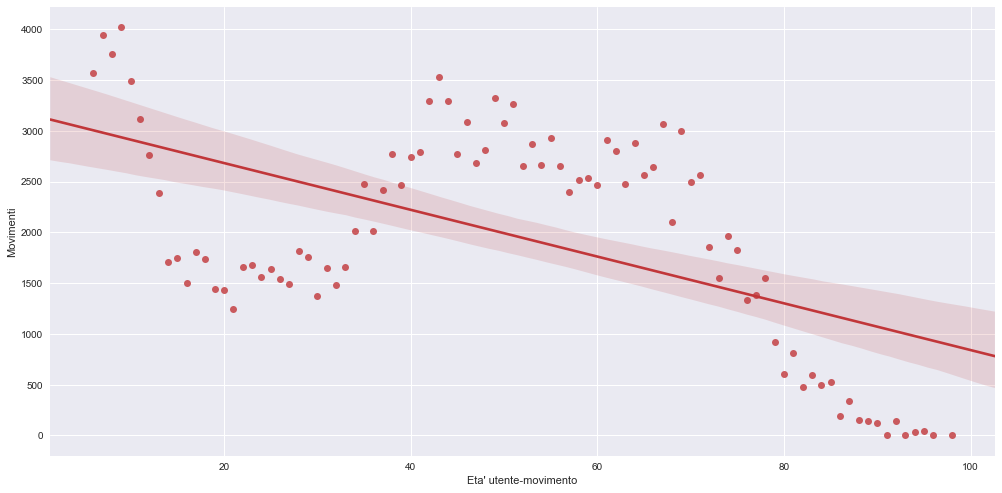

In [299]:
sns.pairplot(data=eta_plot, x_vars='Eta\' utente-movimento', y_vars='Movimenti', size=7, aspect=2, kind='reg')
plt.show()

# Trend - serie storiche

In [300]:
prestiti_per_eta.columns

Index(['Identificativo Titolo', 'Titolo', 'Cod. tipo materiale',
       'Tipo materiale', 'Cod. tipo documento', 'Tipo documento',
       'Cod. natura', 'Natura', 'Cod. tipo monografia', 'Tipo monografia',
       'Anno di pubblicazione', 'Cod. Lingua 1', 'Lingua 1', 'Cod. Paese',
       'Paese', 'Cod. tipo movimento', 'Tipo Movimento',
       'Data inizio movimento', 'Biblioteca movimento',
       'Cod. tipo utente movimento', 'Tipo utente movimento',
       'Eta' utente-movimento', 'Identificativo movimento', 'mese', 'count'],
      dtype='object')

In [301]:
tabella_eta.head()

,Eta' utente-movimento,Movimenti,Fasce di età
0,6,3570,6-10
1,7,3944,6-10
2,8,3756,6-10
3,9,4020,6-10
4,10,3491,6-10


In [302]:
serie_storica_prest_età = prestiti_per_eta[['Identificativo Titolo', 
       'Data inizio movimento', 'Biblioteca movimento','Tipo utente movimento',
       'Eta\' utente-movimento', 'Identificativo movimento']]
serie_storica_prest_età = (
    serie_storica_prest_età.merge(tabella_eta[['Eta\' utente-movimento','Fasce di età']],
                                  left_on='Eta\' utente-movimento', right_on='Eta\' utente-movimento', how='left')
)
serie_storica_prest_età['count'] = 1
serie_storica_prest_età.index = serie_storica_prest_età['Data inizio movimento']

serie_storica_prest_età.head()

,Identificativo Titolo,Data inizio movimento,Biblioteca movimento,Tipo utente movimento,Eta' utente-movimento,Identificativo movimento,Fasce di età,count
Data inizio movimento,,,,,,,,
2017-06-01,223816,2017-06-01,BIBLIOTECA GUGLIELMO MARCONI,LAVORATORE AUTONOMO E COADIUV.,12,14401583,11-14,1
2017-06-01,824347,2017-06-01,BIBLIOTECA GUGLIELMO MARCONI,IMPIEGATO,44,14400733,35-44,1
2017-06-01,42894,2017-06-01,BIBLIOTECA GIORDANO BRUNO,IMPRENDITORE E LIBERO PROFESS.,44,14402407,35-44,1
2017-06-01,42895,2017-06-01,BIBLIOTECA GIORDANO BRUNO,IMPRENDITORE E LIBERO PROFESS.,44,14402415,35-44,1
2017-06-01,235988,2017-06-01,BIBLIOTECA CASA DEL PARCO,RITIRATO DAL LAVORO,80,14399351,75+,1


In [303]:
fasce = [i for i in fasce_istat['Fasce di età']]
fasce

['6-10',
 '11-14',
 '15-17',
 '18-19',
 '20-24',
 '25-34',
 '35-44',
 '45-54',
 '55-59',
 '60-64',
 '65-74',
 '75+']

In [304]:
fascia_6_10 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[0]]
fascia_6_10 = fascia_6_10['count'].resample('W-MON').sum()

fascia_11_14 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[1]]
fascia_11_14 = fascia_11_14['count'].resample('W-MON').sum()

fascia_15_17 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[2]]
fascia_15_17 = fascia_15_17['count'].resample('W-MON').sum()

fascia_18_19 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[3]]
fascia_18_19 = fascia_18_19['count'].resample('W-MON').sum()

fascia_20_24 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[4]]
fascia_20_24 = fascia_20_24['count'].resample('W-MON').sum()

fascia_25_34 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[5]]
fascia_25_34 = fascia_25_34['count'].resample('W-MON').sum()

fascia_35_44 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[6]]
fascia_35_44 = fascia_35_44['count'].resample('W-MON').sum()

fascia_45_54 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[7]]
fascia_45_54 = fascia_45_54['count'].resample('W-MON').sum()

fascia_55_59 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[8]]
fascia_55_59 = fascia_55_59['count'].resample('W-MON').sum()

fascia_60_64 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[9]]
fascia_60_64 = fascia_60_64['count'].resample('W-MON').sum()

fascia_65_74 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[10]]
fascia_65_74 = fascia_65_74['count'].resample('W-MON').sum()

fascia_75 = serie_storica_prest_età[['Fasce di età','count']][serie_storica_prest_età['Fasce di età'] == fasce[11]]
fascia_75 = fascia_75['count'].resample('W-MON').sum()


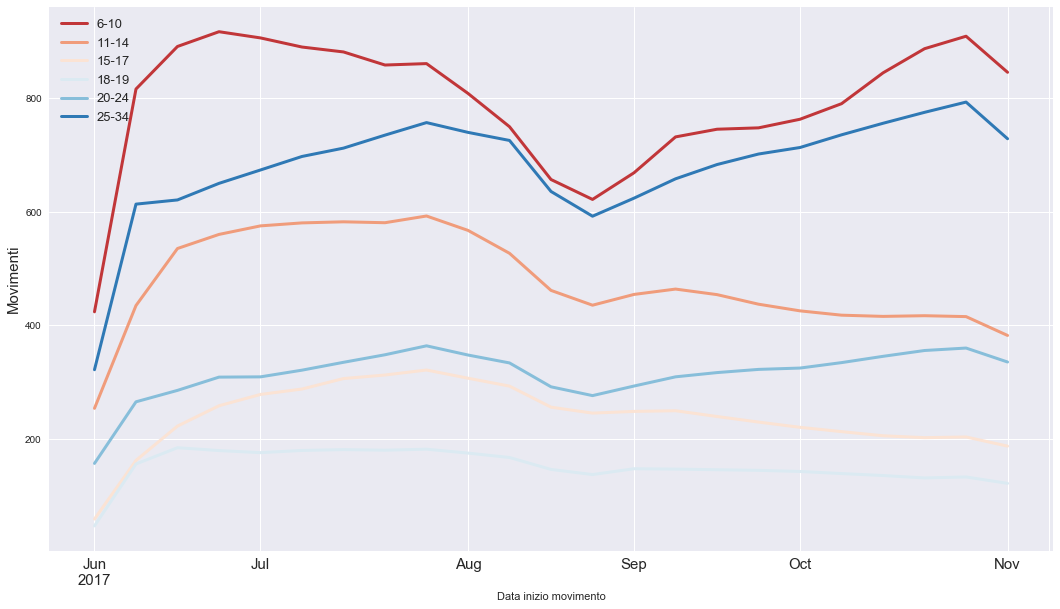

In [305]:
plt.figure(figsize=(18,10))

#from cycler import cycler
#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g','y','b', 'k','m'])))
#plt.rcdefaults()

fascia_6_10.ewm(alpha=2/(len(fascia_6_10)+1)).mean().plot(linewidth=3, label='6-10')
fascia_11_14.ewm(alpha=2/(len(fascia_11_14)+1)).mean().plot(linewidth=3, label='11-14')
fascia_15_17.ewm(alpha=2/(len(fascia_15_17)+1)).mean().plot(linewidth=3,label='15-17')
fascia_18_19.ewm(alpha=2/(len(fascia_18_19)+1)).mean().plot(linewidth=3,label='18-19')
fascia_20_24.ewm(alpha=2/(len(fascia_20_24)+1)).mean().plot(linewidth=3,label='20-24')
fascia_25_34.ewm(alpha=2/(len(fascia_25_34)+1)).mean().plot(linewidth=3,label='25-34')
plt.xticks(fontsize=15)
plt.ylabel('Movimenti', fontsize=15)
plt.legend(fontsize=13)
plt.show()

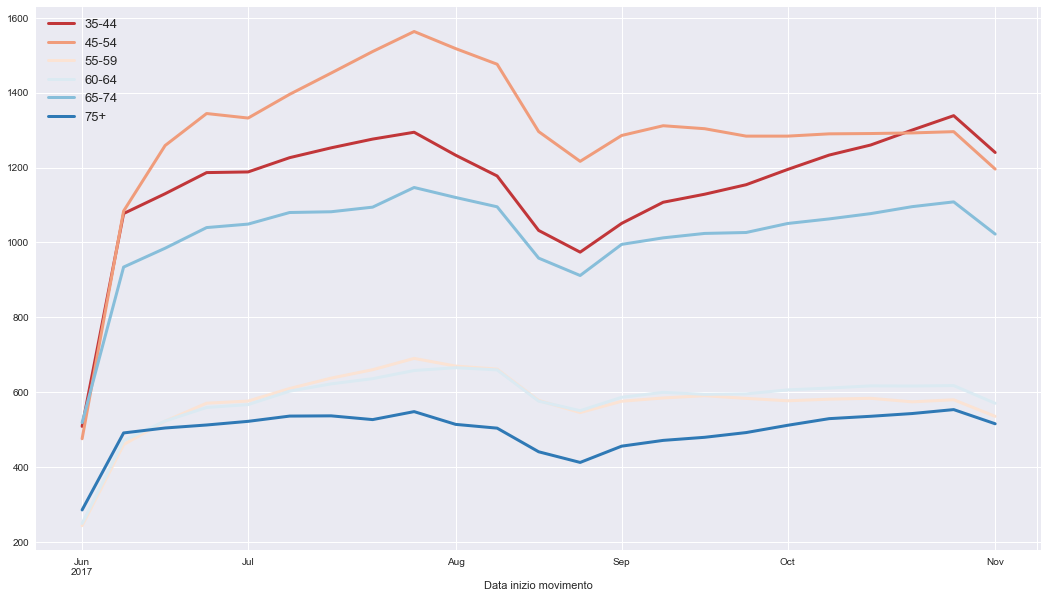

In [306]:
plt.figure(figsize=(18,10))

fascia_35_44.ewm(alpha=2/(len(fascia_11_14)+1)).mean().plot(linewidth=3,label='35-44')
fascia_45_54.ewm(alpha=2/(len(fascia_45_54)+1)).mean().plot(linewidth=3,label='45-54')
fascia_55_59.ewm(alpha=2/(len(fascia_55_59)+1)).mean().plot(linewidth=3,label='55-59')
fascia_60_64.ewm(alpha=2/(len(fascia_60_64)+1)).mean().plot(linewidth=3,label='60-64')
fascia_65_74.ewm(alpha=2/(len(fascia_65_74)+1)).mean().plot(linewidth=3, label='65-74')
fascia_75.ewm(alpha=2/(len(fascia_75)+1)).mean().plot(linewidth=3,label='75+')
plt.legend(fontsize=13)
plt.show()

# Iscrizioni

In [307]:
string_iscrizioni = """
<table border="1" cellpadding="1" cellspacing="1" height="287" width="547">
	<thead>
		<tr>
			<th scope="col" style="width: 220px;">CAMPI OPEN DATA</th>
			<th scope="col" style="width: 267px;">DESCRIZIONE</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td style="width: 220px;">Iscrizione utente</td>
			<td style="width: 267px;">Data completa iscrizione utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Anno iscrizione utente</td>
			<td style="width: 267px;">Anno iscrizione utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. provenienza utente</td>
			<td style="width: 267px;">Codice Provenienza utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Provenienza utente</td>
			<td style="width: 267px;">Provenienza utente (descrizione provenienza)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Età utente</td>
			<td style="width: 267px;">Età utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Sesso</td>
			<td style="width: 267px;">Composizione dei campi: Tipo (G=soggetto giuridico, F=persona fisica) + Sesso (F=femmina, M = maschio)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Sigla Provincia</td>
			<td style="width: 267px;">Siglia provincia</td>
		</tr>
		<tr>
			<td style="width: 220px;">Provincia</td>
			<td style="width: 267px;">Provincia</td>
		</tr>
		<tr>
			<td style="width: 220px;">CAP</td>
			<td style="width: 267px;">Codice avviamento Postale</td>
		</tr>
		<tr>
			<td style="width: 220px;">Città Utente</td>
			<td style="width: 267px;">Città utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Codice Paese</td>
			<td style="width: 267px;">Codice Paese utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Paese utente</td>
			<td style="width: 267px;">Paese utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod.Nazionalità</td>
			<td style="width: 267px;">Codice nazionalità utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Nazionalità utente</td>
			<td style="width: 267px;">Nazionalità utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod.Biblioteca</td>
			<td style="width: 267px;">Codice Biblioteca iscrizione utente</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca utente</td>
			<td style="width: 267px;">Biblioteca iscrizione utente</td>
		</tr>
	</tbody>
</table>

"""

In [308]:
# mappare i nomi delle colonne da sostituire ai nomi dei df con le transazioni
colonne_iscritti = pd.read_html(string_iscrizioni)
colonne_iscritti = colonne_iscritti[0]

colonne_iscritti = colonne_iscritti.reset_index()

map_iscritti = (pd.Series(colonne_iscritti['CAMPI OPEN DATA'],
                           index=colonne_iscritti['index'])
                 .to_dict())

In [309]:
path_iscritti = '/Users/marcogoldin/Documents/P_IVA_conto/MLOL/webinar_data_anayltics/Blog_post_Dati/archivio_medium_post_luglio_2018/iscritti'

iscrizioni = pd.read_csv(os.path.join(path_iscritti, 'ELENCO_UTE_01.csv'), header=None, sep='\t')

iscrizioni.columns = iscrizioni.columns.map(map_iscritti)

In [310]:
iscrizioni['Iscrizione utente'] = pd.to_datetime(iscrizioni['Iscrizione utente'], format='%Y/%m/%d')
iscrizioni.index = iscrizioni['Iscrizione utente']
iscrizioni = iscrizioni.sort_index()
logging.info(' Totale iscritti: {}, Data inizio: {}, Data fine: {}'.format(len(iscrizioni), iscrizioni.index[0], iscrizioni.index[-1]))
iscrizioni = iscrizioni['2017-06-01':'2017-10-31']
logging.info(' Totale iscritti nel periodo giugno-ottobre 2017: {}'.format(len(iscrizioni)))

2018-07-26 13:48:01,680 INFO: Totale iscritti: 650266, Data inizio: 2005-03-03 00:00:00, Data fine: 2018-04-16 00:00:00
2018-07-26 13:48:01,699 INFO: Totale iscritti nel periodo giugno-ottobre 2017: 8672


### per coerenza filtro iscrizioni con le biblioteche > 25. percentile movimenti nel periodo

In [311]:
logging.info(' Totale iscritti nel periodo giugno-ottobre 2017: {}'.format(len(iscrizioni)))
iscrizioni = iscrizioni[iscrizioni['Biblioteca utente'].isin(mov_biblioteche_max['Biblioteca movimento'])]
# filtro i null età
logging.info(' Totale iscritti nel periodo giugno-ottobre 2017 con età null: {}'.format(len(iscrizioni)))
iscrizioni = iscrizioni[iscrizioni['Età utente'].notnull()]
iscrizioni['Età utente'] = iscrizioni['Età utente'].astype(int)
logging.info(' Totale iscritti nel periodo giugno-ottobre 2017: {}'.format(len(iscrizioni)))

2018-07-26 13:48:04,529 INFO: Totale iscritti nel periodo giugno-ottobre 2017: 8672
2018-07-26 13:48:04,582 INFO: Totale iscritti nel periodo giugno-ottobre 2017 con età null: 7803
2018-07-26 13:48:04,650 INFO: Totale iscritti nel periodo giugno-ottobre 2017: 7781


In [312]:
iscrizioni = iscrizioni[['Iscrizione utente', 'Età utente', 'Sesso',
       'Sigla Provincia', 'Provincia', 'CAP', 'Città Utente', 
       'Paese utente', 'Nazionalità utente','Biblioteca utente']]

In [313]:
iscrizioni.head()

,Iscrizione utente,Età utente,Sesso,Sigla Provincia,Provincia,CAP,Città Utente,Paese utente,Nazionalità utente,Biblioteca utente
Iscrizione utente,,,,,,,,,,
2017-06-01,2017-06-01,9,FF,RM,ROMA,00154,ROMA,ITALIA,NaN,BIBLIOTECA GUGLIELMO MARCONI
2017-06-01,2017-06-01,5,FF,RM,ROMA,00158,ROMA,ITALIA,ITALIA,BIBLIOTECA VACCHERIA NARDI
2017-06-01,2017-06-01,5,FM,RM,ROMA,00162,ROMA,ITALIA,ITALIA,BIBLIOTECA GIANNI RODARI
2017-06-01,2017-06-01,8,FF,RM,ROMA,00157,ROMA,ITALIA,ITALIA,BIBLIOTECA VACCHERIA NARDI
2017-06-01,2017-06-01,8,FF,RM,ROMA,00158,ROMA,ITALIA,ITALIA,BIBLIOTECA VACCHERIA NARDI


In [314]:
iscrizioni[['Età utente']].describe()[3:]

,Età utente
min,1.0
25%,13.0
50%,23.0
75%,40.0
max,997.0


# wtf? 997 anni?

In [315]:
iscrizioni = iscrizioni[(iscrizioni['Età utente'] >= 6) & (iscrizioni['Età utente'] < 100)]
logging.info(' Totale iscritti 6+ anni senza Matusalemme o Gandalf il Grigio: {}'.format(len(iscrizioni)))

2018-07-26 13:48:15,701 INFO: Totale iscritti 6+ anni senza Matusalemme o Gandalf il Grigio: 7312


In [316]:
iscrizioni_per_età = iscrizioni.groupby('Età utente').size().reset_index().rename(columns={0:'Iscrizioni'})
iscrizioni_per_età.head()

,Età utente,Iscrizioni
0,6,161
1,7,146
2,8,184
3,9,269
4,10,221


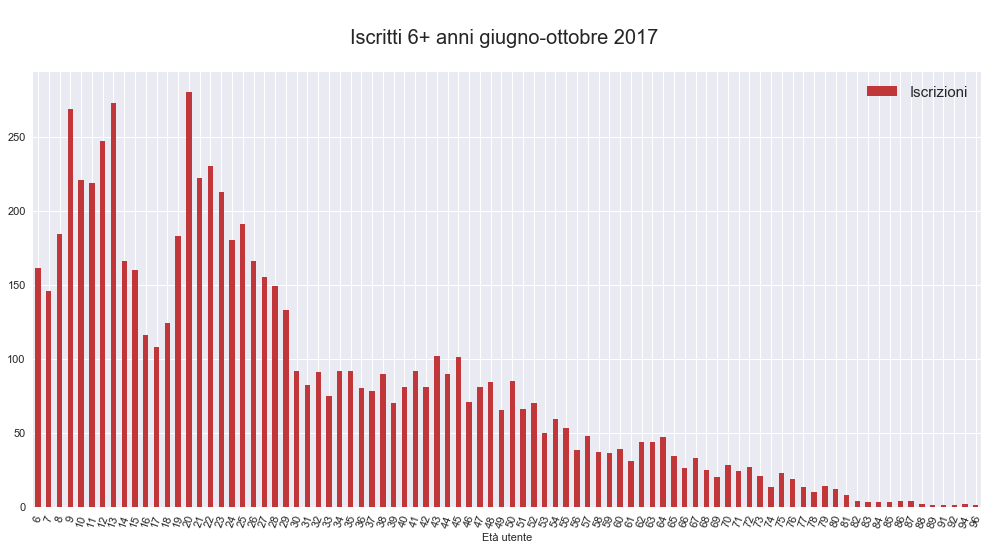

In [317]:
eta_plot = iscrizioni_per_età[['Età utente','Iscrizioni']]
eta_plot.index = eta_plot['Età utente']
eta_plot[['Iscrizioni']].plot(kind='bar', figsize=(17,8), rot=70, fontsize=11)
plt.title('\nIscritti 6+ anni giugno-ottobre 2017 \n', fontsize=20)
plt.legend(fontsize=15)
plt.show()

# che secondo il binning ISTAT sarebbe

In [318]:
# colonna con fasce di età

'''
# età ISTAT: https://www.istat.it/it/archivio/213851
6-10
11-14
15-17
18-19
20-24
25-34
35-44
45-54
55-59
60-64
65-74
75 e più
'''

criteri = [iscrizioni_per_età['Età utente'].between(6, 10), iscrizioni_per_età['Età utente'].between(11, 14),
           iscrizioni_per_età['Età utente'].between(15, 17), iscrizioni_per_età['Età utente'].between(18, 19),
          iscrizioni_per_età['Età utente'].between(20, 24), iscrizioni_per_età['Età utente'].between(25, 34),
           iscrizioni_per_età['Età utente'].between(35, 44), iscrizioni_per_età['Età utente'].between(45, 54),
          iscrizioni_per_età['Età utente'].between(55, 59), iscrizioni_per_età['Età utente'].between(60, 64),
          iscrizioni_per_età['Età utente'].between(65, 74), iscrizioni_per_età['Età utente'].between(75, 100)]

valori = ['6-10', '11-14','15-17','18-19','20-24','25-34','35-44','45-54','55-59','60-64','65-74','75+']

iscrizioni_per_età['Fasce di età'] = np.select(criteri, valori)

In [319]:
iscrizioni_per_età.head(3)

,Età utente,Iscrizioni,Fasce di età
0,6,161,6-10
1,7,146,6-10
2,8,184,6-10


In [320]:
fasce_istat = iscrizioni_per_età.groupby('Fasce di età')['Iscrizioni'].sum().reset_index()
fasce_istat = (
    fasce_istat.merge(iscrizioni_per_età[['Età utente','Fasce di età']].drop_duplicates('Fasce di età'),
                     left_on='Fasce di età', right_on='Fasce di età', how='left')
)
fasce_istat = fasce_istat.sort_values('Età utente')
fasce_istat.head(2)

,Fasce di età,Iscrizioni,Età utente
8,6-10,981,6
0,11-14,905,11


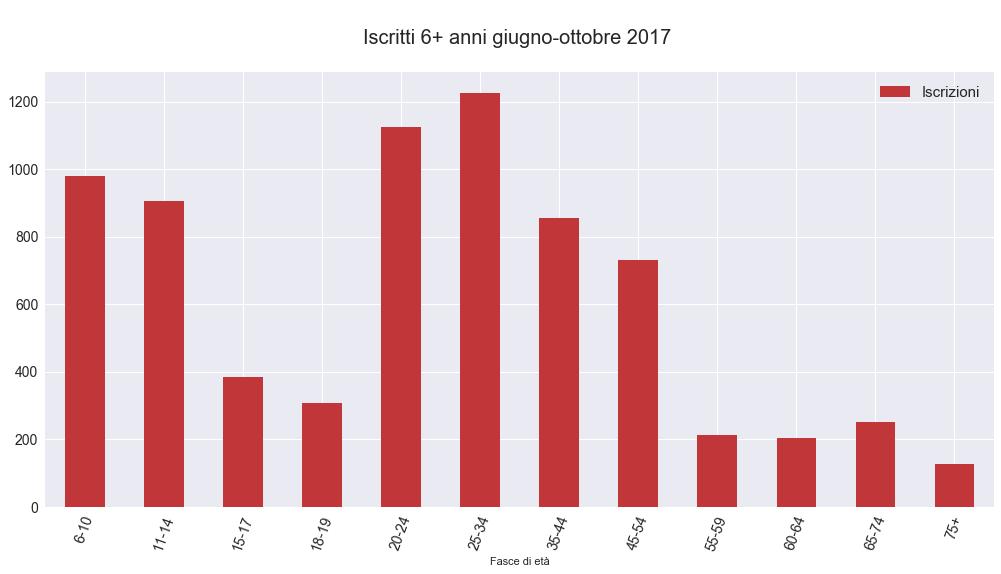

In [321]:
eta_plot = fasce_istat[['Fasce di età','Iscrizioni']]
eta_plot.index = eta_plot['Fasce di età']
eta_plot[['Iscrizioni']].plot(kind='bar', figsize=(17,8), rot=70, fontsize=14)
plt.title('\nIscritti 6+ anni giugno-ottobre 2017 \n', fontsize=20)
plt.legend(fontsize=15)
plt.show()

 # Andamento medio delle iscrizioni per fascia di età

In [322]:
serie_iscrizioni = iscrizioni[['Iscrizione utente', 'Età utente', 'Sesso', 'Sigla Provincia',
       'Provincia', 'CAP', 'Città Utente', 'Paese utente','Biblioteca utente']]
serie_iscrizioni['count'] = 1


In [323]:
# colonna con fasce di età
criteri = [serie_iscrizioni['Età utente'].between(6, 10), serie_iscrizioni['Età utente'].between(11, 14),
           serie_iscrizioni['Età utente'].between(15, 17), serie_iscrizioni['Età utente'].between(18, 19),
          serie_iscrizioni['Età utente'].between(20, 24), serie_iscrizioni['Età utente'].between(25, 34),
           serie_iscrizioni['Età utente'].between(35, 44), serie_iscrizioni['Età utente'].between(45, 54),
          serie_iscrizioni['Età utente'].between(55, 59), serie_iscrizioni['Età utente'].between(60, 64),
          serie_iscrizioni['Età utente'].between(65, 74), serie_iscrizioni['Età utente'].between(75, 100)]

valori = ['6-10', '11-14','15-17','18-19','20-24','25-34','35-44','45-54','55-59','60-64','65-74','75+']

serie_iscrizioni['Fasce di età'] = np.select(criteri, valori)

In [324]:
fasce

['6-10',
 '11-14',
 '15-17',
 '18-19',
 '20-24',
 '25-34',
 '35-44',
 '45-54',
 '55-59',
 '60-64',
 '65-74',
 '75+']

In [325]:
serie_iscrizioni.columns

Index(['Iscrizione utente', 'Età utente', 'Sesso', 'Sigla Provincia',
       'Provincia', 'CAP', 'Città Utente', 'Paese utente', 'Biblioteca utente',
       'count', 'Fasce di età'],
      dtype='object')

In [326]:
fascia_6_10 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[0]]
fascia_6_10 = fascia_6_10['count'].resample('W-MON').sum()

fascia_11_14 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[1]]
fascia_11_14 = fascia_11_14['count'].resample('W-MON').sum()

fascia_15_17 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[2]]
fascia_15_17 = fascia_15_17['count'].resample('W-MON').sum()

fascia_18_19 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[3]]
fascia_18_19 = fascia_18_19['count'].resample('W-MON').sum()

fascia_20_24 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[4]]
fascia_20_24 = fascia_20_24['count'].resample('W-MON').sum()

fascia_25_34 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[5]]
fascia_25_34 = fascia_25_34['count'].resample('W-MON').sum()

fascia_35_44 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[6]]
fascia_35_44 = fascia_35_44['count'].resample('W-MON').sum()

fascia_45_54 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[7]]
fascia_45_54 = fascia_45_54['count'].resample('W-MON').sum()

fascia_55_59 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[8]]
fascia_55_59 = fascia_55_59['count'].resample('W-MON').sum()

fascia_60_64 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[9]]
fascia_60_64 = fascia_60_64['count'].resample('W-MON').sum()

fascia_65_74 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[10]]
fascia_65_74 = fascia_65_74['count'].resample('W-MON').sum()

fascia_75 = serie_iscrizioni[['Fasce di età','count']][serie_iscrizioni['Fasce di età'] == fasce[11]]
fascia_75 = fascia_75['count'].resample('W-MON').sum()


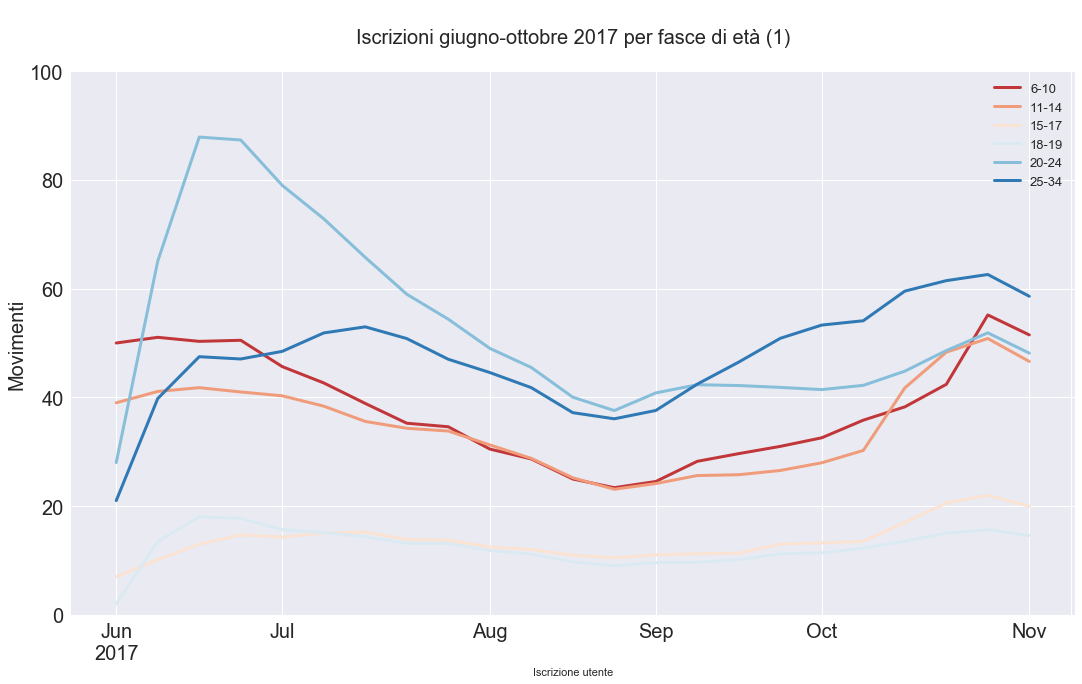

In [330]:
plt.figure(figsize=(18,10))

#from cycler import cycler
#plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g','y','b', 'k','m'])))
#plt.rcdefaults()

fascia_6_10.ewm(alpha=2/(len(fascia_6_10)+1)).mean().plot(linewidth=3, label='6-10',fontsize=20)
fascia_11_14.ewm(alpha=2/(len(fascia_11_14)+1)).mean().plot(linewidth=3, label='11-14',fontsize=20)
fascia_15_17.ewm(alpha=2/(len(fascia_15_17)+1)).mean().plot(linewidth=3,label='15-17',fontsize=20)
fascia_18_19.ewm(alpha=2/(len(fascia_18_19)+1)).mean().plot(linewidth=3,label='18-19',fontsize=20)
fascia_20_24.ewm(alpha=2/(len(fascia_20_24)+1)).mean().plot(linewidth=3,label='20-24',fontsize=20)
fascia_25_34.ewm(alpha=2/(len(fascia_25_34)+1)).mean().plot(linewidth=3,label='25-34',fontsize=20)
plt.ylabel('Movimenti', fontsize=20)
plt.title('\nIscrizioni giugno-ottobre 2017 per fasce di età (1)\n', fontsize=20)
plt.ylim([0,100])
plt.legend(fontsize=13)
plt.show()

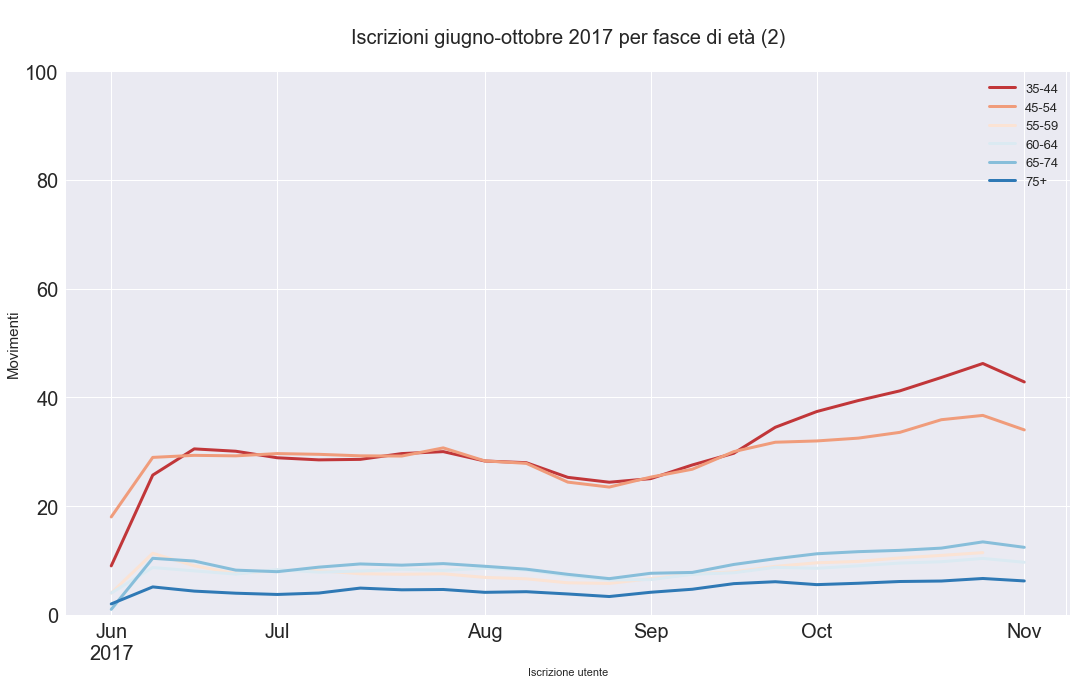

In [329]:
plt.figure(figsize=(18,10))

fascia_35_44.ewm(alpha=2/(len(fascia_11_14)+1)).mean().plot(linewidth=3,label='35-44', fontsize=20)
fascia_45_54.ewm(alpha=2/(len(fascia_45_54)+1)).mean().plot(linewidth=3,label='45-54', fontsize=20)
fascia_55_59.ewm(alpha=2/(len(fascia_55_59)+1)).mean().plot(linewidth=3,label='55-59',fontsize=20)
fascia_60_64.ewm(alpha=2/(len(fascia_60_64)+1)).mean().plot(linewidth=3,label='60-64',fontsize=20)
fascia_65_74.ewm(alpha=2/(len(fascia_65_74)+1)).mean().plot(linewidth=3, label='65-74',fontsize=20)
fascia_75.ewm(alpha=2/(len(fascia_75)+1)).mean().plot(linewidth=3,label='75+',fontsize=20)
plt.ylabel('Movimenti', fontsize=15)
plt.title('\nIscrizioni giugno-ottobre 2017 per fasce di età (2)\n', fontsize=20)
plt.ylim([0,100])
plt.legend(fontsize=13)
plt.show()

# bonus track

# Nuove acquisizioni settembre 2017-aprile -2018

In [ ]:
# da marzo 2018 (movimenti di febbraio quindi) sono stati aggiunti dei campi
# i dataset vanno importati a blocchi separati
# pre-marzo vanno aggiunte le colonne mancanti
# vedi: https://www.bibliotechediroma.it/it/open-data-movimento-prestiti-nuove-acquisizioni-roma

In [ ]:
# le colonne aggiunte da marzo 2018 sono:
# Data ingresso
# Data inizio movimento
# Data stima fine movimento
# Data fine movimento
# Data inizio stato movimento

# Nuove acquisizioni pre marzo 2018

# Html parsing senza le colonne nuove di marzo 2018

In [ ]:
# view source: https://www.bibliotechediroma.it/it/open-data-movimento-prestiti-nuove-acquisizioni-roma
nuove_acquisizioni_string_pre_marzo_2018 = """
<table border="1" cellpadding="1" cellspacing="1" height="287" width="547">
	<thead>
		<tr>
			<th scope="col" style="width: 220px;">CAMPI OPEN DATA</th>
			<th scope="col" style="width: 267px;">DESCRIZIONE</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td style="width: 220px;">Identificativo Titolo</td>
			<td style="width: 267px;">Identificativo Titolo</td>
		</tr>
		<tr>
			<td style="width: 220px;">Titolo</td>
			<td style="width: 267px;">Titolo (campo ISBD completo)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Titoli in indice</td>
			<td style="width: 267px;">Titolo presente nell'Indice Bibliotecario nazionale (SI/NO)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo materiale</td>
			<td style="width: 267px;">Codice Tipo Materiale</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo materiale</td>
			<td style="width: 267px;">Tipo materiale descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo documento</td>
			<td style="width: 267px;">Codice Tipo Documento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo documento</td>
			<td style="width: 267px;">Tipo documento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. natura</td>
			<td style="width: 267px;">Codice Natura</td>
		</tr>
		<tr>
			<td style="width: 220px;">Natura</td>
			<td style="width: 267px;">Natura descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo monografia</td>
			<td style="width: 267px;">Codice Tipo Monografia</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo monografia</td>
			<td style="width: 267px;">Tipo Monografia descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Anno di pubblicazione</td>
			<td style="width: 267px;">Anno di pubblicazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. genere 1</td>
			<td style="width: 267px;">Codice Genere 1</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 1</td>
			<td style="width: 267px;">Genere 1 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. genere 2</td>
			<td style="width: 267px;">Codice Genere 2</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 2</td>
			<td style="width: 267px;">Genere 2 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Genere 3</td>
			<td style="width: 267px;">Codice Genere 3</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 3</td>
			<td style="width: 267px;">Genere 3 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Genere 4</td>
			<td style="width: 267px;">Codice Genere 4</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 4</td>
			<td style="width: 267px;">Genere 4 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 1</td>
			<td style="width: 267px;">Codice Lingua 1</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 1</td>
			<td style="width: 267px;">Lingua 1 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 2</td>
			<td style="width: 267px;">Codice Lingua 2</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 2</td>
			<td style="width: 267px;">Lingua 2 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 3</td>
			<td style="width: 267px;">Codice Lingua 3</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 3</td>
			<td style="width: 267px;">Lingua 3 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Paese</td>
			<td style="width: 267px;">Codice Paese</td>
		</tr>
		<tr>
			<td style="width: 220px;">Paese</td>
			<td style="width: 267px;">Paese descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Serie inv.</td>
			<td style="width: 267px;">Serie inventariale</td>
		</tr>
		<tr>
			<td style="width: 220px;">N. inventario</td>
			<td style="width: 267px;">Numero di inventario</td>
		</tr>
		<tr>
			<td style="width: 220px;">Appendice</td>
			<td style="width: 267px;">Appendice</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data inserimento</td>
			<td style="width: 267px;">Data inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Biblioteca inventario</td>
			<td style="width: 267px;">Codice univoco della biblioteca che ha effettuato l'inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca inventario</td>
			<td style="width: 267px;">Denominazione della biblioteca che ha effettuato l'inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo movimento</td>
			<td style="width: 267px;">Codice Tipo Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo movimento</td>
			<td style="width: 267px;">Tipo Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. stato movimento</td>
			<td style="width: 267px;">Codice Stato Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Stato movimento</td>
			<td style="width: 267px;">Stato Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Biblioteca movimento</td>
			<td style="width: 267px;">Codice Biblioteca movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca movimento</td>
			<td style="width: 267px;">Denominazione completa Biblioteca (biblioteca prestante nel caso PIM)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo utente movimento</td>
			<td style="width: 267px;">Codice Tipo Utente Movimento (professione)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo utente movimento</td>
			<td style="width: 267px;">Tipo Utente (professione) Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo provenienza movimento</td>
			<td style="width: 267px;">Codice Tipo Provenienza</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo provenienza movimento</td>
			<td style="width: 267px;">Tipo Provenienza descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Eta' utente-movimento</td>
			<td style="width: 267px;">Età utente che ha effettuato il movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Identificativo movimento</td>
			<td style="width: 267px;">Identificativo univoco del movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Identificativo richiesta ill</td>
			<td style="width: 267px;">Identificativo univoco della richiesta ILL</td>
		</tr>
	</tbody>
</table>
"""

In [ ]:
# mappare i nomi delle colonne da sostituire ai nomi dei df con le transazioni
colonne_prestiti_nuove_acquisizioni_del_mese = pd.read_html(nuove_acquisizioni_string_pre_marzo_2018)
colonne_prestiti_nuove_acquisizioni_del_mese = colonne_prestiti_nuove_acquisizioni_del_mese[0]

colonne_prestiti_nuove_acquisizioni_del_mese = colonne_prestiti_nuove_acquisizioni_del_mese.reset_index()

map_nuove_acq = (pd.Series(colonne_prestiti_nuove_acquisizioni_del_mese['CAMPI OPEN DATA'],
                           index=colonne_prestiti_nuove_acquisizioni_del_mese['index'])
                 .to_dict())

In [ ]:
import glob
path = '/Users/marcogoldin/Documents/P_IVA_conto/MLOL/webinar_data_anayltics/Blog_post_Dati/archivio_medium_post_luglio_2018/nuove_acquisizioni'
allFiles = glob.glob(path + "/*.csv")
df_nuove_acquisizioni = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None, sep='\t')
    list_.append(df)
df_nuove_acquisizioni = pd.concat(list_)
logging.info('Len frame: {}'.format(len(df_nuove_acquisizioni)))
df_nuove_acquisizioni.columns = df_nuove_acquisizioni.columns.map(map_nuove_acq)
df_nuove_acquisizioni.head(2)

In [ ]:
# le colonne aggiunte da marzo 2018 sono:
# Data ingresso
# Data inizio movimento
# Data stima fine movimento
# Data fine movimento
# Data inizio stato movimento

In [ ]:
# formato data inizio movimento: giorno-mese-anno
# colonna 'Data inizio movimento'
# 30/03/2018

In [ ]:
#settembre
x = pd.read_csv(os.path.join(path, 'DET_P_NUOVOACQ_MESEPREC_01_settembre_2017.csv'), header=None, sep='\t')
x.columns = x.columns.map(map_nuove_acq)
x['Data inizio movimento'] = np.random.choice(pd.date_range(start='9/1/2017', end='30/09/2017'), size=len(x))
x['Data inizio movimento'] = x['Data inizio movimento'].apply(lambda x: x.strftime('%d/%m/%Y'))

#ottobre
x1 = pd.read_csv(os.path.join(path, 'DET_P_NUOVOACQ_MESEPREC_01_ottobre_2017.csv'), header=None, sep='\t')
x1.columns = x1.columns.map(map_nuove_acq)
x1['Data inizio movimento'] = np.random.choice(pd.date_range(start='10/1/2017', end='31/10/2017'), size=len(x1))
x1['Data inizio movimento'] = x1['Data inizio movimento'].apply(lambda x: x.strftime('%d/%m/%Y'))

#novembre
x2 = pd.read_csv(os.path.join(path, 'DET_P_NUOVOACQ_MESEPREC_01_novembre_2017.csv'), header=None, sep='\t')
x2.columns = x2.columns.map(map_nuove_acq)
x2['Data inizio movimento'] = np.random.choice(pd.date_range(start='11/1/2017', end='30/11/2017'), size=len(x2))
x2['Data inizio movimento'] = x2['Data inizio movimento'].apply(lambda x: x.strftime('%d/%m/%Y'))

#dicembre
x3 = pd.read_csv(os.path.join(path, 'DET_P_NUOVOACQ_MESEPREC_01_dicembre_2017.csv'), header=None, sep='\t')
x3.columns = x3.columns.map(map_nuove_acq)
x3['Data inizio movimento'] = np.random.choice(pd.date_range(start='12/1/2017', end='31/12/2017'), size=len(x3))
x3['Data inizio movimento'] = x3['Data inizio movimento'].apply(lambda x: x.strftime('%d/%m/%Y'))

#gennaio
x4 = pd.read_csv(os.path.join(path, 'DET_P_NUOVOACQ_MESEPREC_01_gennaio_2018.csv'), header=None, sep='\t')
x4.columns = x4.columns.map(map_nuove_acq)
x4['Data inizio movimento'] = np.random.choice(pd.date_range(start='1/1/2018', end='31/1/2018'), size=len(x4))
x4['Data inizio movimento'] = x4['Data inizio movimento'].apply(lambda x: x.strftime('%d/%m/%Y'))


In [ ]:
# unico dataframe settembre 2017-gennaio 2018 con campo 'Data inizio movimento'
df_nuove_acquisizioni = x.append(x1).append(x2).append(x3).append(x4)

In [ ]:
len(df_nuove_acquisizioni)

# Nuove acquisizioni post febbraio 2018

In [ ]:
# view source: https://www.bibliotechediroma.it/it/open-data-movimento-prestiti-nuove-acquisizioni-roma
nuove_acquisizioni_string_post_marzo_2018 = """
<table border="1" cellpadding="1" cellspacing="1" height="287" width="547">
	<thead>
		<tr>
			<th scope="col" style="width: 220px;">CAMPI OPEN DATA</th>
			<th scope="col" style="width: 267px;">DESCRIZIONE</th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td style="width: 220px;">Identificativo Titolo</td>
			<td style="width: 267px;">Identificativo Titolo</td>
		</tr>
		<tr>
			<td style="width: 220px;">Titolo</td>
			<td style="width: 267px;">Titolo (campo ISBD completo)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Titoli in indice</td>
			<td style="width: 267px;">Titolo presente nell'Indice Bibliotecario nazionale (SI/NO)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo materiale</td>
			<td style="width: 267px;">Codice Tipo Materiale</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo materiale</td>
			<td style="width: 267px;">Tipo materiale descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo documento</td>
			<td style="width: 267px;">Codice Tipo Documento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo documento</td>
			<td style="width: 267px;">Tipo documento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. natura</td>
			<td style="width: 267px;">Codice Natura</td>
		</tr>
		<tr>
			<td style="width: 220px;">Natura</td>
			<td style="width: 267px;">Natura descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo monografia</td>
			<td style="width: 267px;">Codice Tipo Monografia</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo monografia</td>
			<td style="width: 267px;">Tipo Monografia descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Anno di pubblicazione</td>
			<td style="width: 267px;">Anno di pubblicazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. genere 1</td>
			<td style="width: 267px;">Codice Genere 1</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 1</td>
			<td style="width: 267px;">Genere 1 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. genere 2</td>
			<td style="width: 267px;">Codice Genere 2</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 2</td>
			<td style="width: 267px;">Genere 2 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Genere 3</td>
			<td style="width: 267px;">Codice Genere 3</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 3</td>
			<td style="width: 267px;">Genere 3 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Genere 4</td>
			<td style="width: 267px;">Codice Genere 4</td>
		</tr>
		<tr>
			<td style="width: 220px;">Genere 4</td>
			<td style="width: 267px;">Genere 4 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 1</td>
			<td style="width: 267px;">Codice Lingua 1</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 1</td>
			<td style="width: 267px;">Lingua 1 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 2</td>
			<td style="width: 267px;">Codice Lingua 2</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 2</td>
			<td style="width: 267px;">Lingua 2 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Lingua 3</td>
			<td style="width: 267px;">Codice Lingua 3</td>
		</tr>
		<tr>
			<td style="width: 220px;">Lingua 3</td>
			<td style="width: 267px;">Lingua 3 descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Paese</td>
			<td style="width: 267px;">Codice Paese</td>
		</tr>
		<tr>
			<td style="width: 220px;">Paese</td>
			<td style="width: 267px;">Paese descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Serie inv.</td>
			<td style="width: 267px;">Serie inventariale</td>
		</tr>
		<tr>
			<td style="width: 220px;">N. inventario</td>
			<td style="width: 267px;">Numero di inventario</td>
		</tr>
		<tr>
			<td style="width: 220px;">Appendice</td>
			<td style="width: 267px;">Appendice</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data inserimento</td>
			<td style="width: 267px;">Data inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data ingresso</td>
			<td style="width: 267px;">Data ingresso (*)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Biblioteca inventario</td>
			<td style="width: 267px;">Codice univoco della biblioteca che ha effettuato l'inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca inventario</td>
			<td style="width: 267px;">Denominazione della biblioteca che ha effettuato l'inventariazione</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo movimento</td>
			<td style="width: 267px;">Codice Tipo Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo movimento</td>
			<td style="width: 267px;">Tipo Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. stato movimento</td>
			<td style="width: 267px;">Codice Stato Movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Stato movimento</td>
			<td style="width: 267px;">Stato Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data inizio movimento</td>
			<td style="width: 267px;">Data inizio movimento (*)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data stima fine movimento</td>
			<td style="width: 267px;">Data stima fine movimento (*)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data fine movimento</td>
			<td style="width: 267px;">Data fine movimento (*)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Data inizio stato movimento</td>
			<td style="width: 267px;">Data inizio stato movimento (*)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. Biblioteca movimento</td>
			<td style="width: 267px;">Codice Biblioteca movimento (prestito)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Biblioteca movimento</td>
			<td style="width: 267px;">Denominazione completa Biblioteca (biblioteca prestante nel caso PIM)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo utente movimento</td>
			<td style="width: 267px;">Codice Tipo Utente Movimento (professione)</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo utente movimento</td>
			<td style="width: 267px;">Tipo Utente (professione) Movimento descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Cod. tipo provenienza movimento</td>
			<td style="width: 267px;">Codice Tipo Provenienza</td>
		</tr>
		<tr>
			<td style="width: 220px;">Tipo provenienza movimento</td>
			<td style="width: 267px;">Tipo Provenienza descrizione estesa</td>
		</tr>
		<tr>
			<td style="width: 220px;">Eta' utente-movimento</td>
			<td style="width: 267px;">Età utente che ha effettuato il movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Identificativo movimento</td>
			<td style="width: 267px;">Identificativo univoco del movimento</td>
		</tr>
		<tr>
			<td style="width: 220px;">Identificativo richiesta ill</td>
			<td style="width: 267px;">Identificativo univoco della richiesta ILL</td>
		</tr>
	</tbody>
</table>
"""

In [ ]:
# mappare i nomi delle colonne da sostituire ai nomi dei df con le transazioni
colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018 = pd.read_html(nuove_acquisizioni_string_post_marzo_2018)
colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018 = colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018[0]

colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018 = colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018.reset_index()

map_nuove_acq_marzo_2018 = (pd.Series(colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018['CAMPI OPEN DATA'],
                           index=colonne_prestiti_nuove_acquisizioni_del_mese_post_marzo_2018['index'])
                 .to_dict())

In [ ]:
path = '/Users/marcogoldin/Documents/P_IVA_conto/MLOL/webinar_data_anayltics/Blog_post_Dati/archivio_medium_post_luglio_2018/nuove_acquisizioni/prest_novita_da_marzo_2018'
allFiles = glob.glob(path + "/*.csv")
df_nuove_acquisizioni_marzo_2018 = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=None, sep='\t')
    list_.append(df)
df_nuove_acquisizioni_marzo_2018 = pd.concat(list_)
logging.info('Len frame: {}'.format(len(df_nuove_acquisizioni_marzo_2018)))
df_nuove_acquisizioni_marzo_2018.columns = df_nuove_acquisizioni_marzo_2018.columns.map(map_nuove_acq_marzo_2018)

df_nuove_acquisizioni_marzo_2018['Data inizio movimento'] = (
    pd.to_datetime(df_nuove_acquisizioni_marzo_2018['Data inizio movimento'], format='%d/%m/%Y')
)

df_nuove_acquisizioni_marzo_2018['Data inizio movimento'] = (
    df_nuove_acquisizioni_marzo_2018['Data inizio movimento'].apply(lambda x: x.strftime('%d/%m/%Y'))

)
df_nuove_acquisizioni_marzo_2018 = df_nuove_acquisizioni_marzo_2018[df_nuove_acquisizioni.columns]
logging.info('Len frame: {}'.format(len(df_nuove_acquisizioni_marzo_2018)))

# Unisco i due df

In [ ]:
logging.info(' Len df pre febbraio 2018: {}'.format(len(df_nuove_acquisizioni)))
logging.info(' Len df post febbraio 2018: {}\n'.format(len(df_nuove_acquisizioni_marzo_2018)))
logging.info(' Len cols df pre febraio 2018: {}'.format(len(df_nuove_acquisizioni.columns)))
logging.info(' Len cols df post febraio 2018: {}'.format(len(df_nuove_acquisizioni_marzo_2018.columns)))


In [ ]:
# unione dataframe pre febbraio 2018 e post febbraio 2018
prestiti_su_nuove_acquisizioni = df_nuove_acquisizioni.append(df_nuove_acquisizioni_marzo_2018)

logging.info(' Len df total 2017 - 2018: {}'.format(len(prestiti_su_nuove_acquisizioni)))
logging.info(' Len cols df finale 2018: {}'.format(len(prestiti_su_nuove_acquisizioni.columns)))


In [ ]:
cols = ['Identificativo Titolo', 'Titolo', 'Titoli in indice',
       'Cod. tipo materiale', 'Tipo materiale', 'Cod. tipo documento',
       'Tipo documento', 'Cod. natura', 'Natura', 'Cod. tipo monografia',
       'Tipo monografia', 'Anno di pubblicazione', 'Cod. Lingua 1', 'Lingua 1',
       'Cod. Paese',
       'Paese', 'N. inventario', 'Data inserimento',
       'Cod. Biblioteca inventario', 'Biblioteca inventario',
       'Cod. tipo movimento', 'Tipo movimento', 'Cod. stato movimento',
       'Stato movimento', 'Cod. Biblioteca movimento', 'Biblioteca movimento',
       'Cod. tipo utente movimento', 'Tipo utente movimento',
       'Eta\' utente-movimento', 'Data inizio movimento']
prestiti_su_nuove_acquisizioni = prestiti_su_nuove_acquisizioni[cols]

# Pulizia del dataset completo settembre 2017 - maggio 2018

In [ ]:
# date
prestiti_su_nuove_acquisizioni['Data inizio movimento'] = pd.to_datetime(prestiti_su_nuove_acquisizioni['Data inizio movimento'], format='%d/%m/%Y')
prestiti_su_nuove_acquisizioni.index = prestiti_su_nuove_acquisizioni['Data inizio movimento']
prestiti_su_nuove_acquisizioni = prestiti_su_nuove_acquisizioni.sort_index()
# check data inizio e data fine periodo
logging.info(' Prima data del periodo: {}'.format(prestiti_su_nuove_acquisizioni.index[0]))
logging.info(' Ultima data del periodo: {}'.format(prestiti_su_nuove_acquisizioni.index[-1]))

In [ ]:
logging.info(' Identificativi univoci titoli: {}'.format(len(prestiti_su_nuove_acquisizioni['Identificativo Titolo'].unique())))
logging.info(' Inventari univoci: {}'.format(len(prestiti_su_nuove_acquisizioni['N. inventario'].unique())))
logging.info(' Totale prestiti del sistema settembre 2017-maggio 2018: {}'.format(len(prestiti_su_nuove_acquisizioni)))

In [ ]:
prestiti_su_nuove_acquisizioni['Cod. tipo materiale'].value_counts()

In [ ]:
prestiti_su_nuove_acquisizioni['Tipo materiale'].value_counts()

## Filtro solo tipologia materiale "Libro moderno" senza audiovisivi e musica

In [ ]:
prestiti_su_nuove_acquisizioni = prestiti_su_nuove_acquisizioni[prestiti_su_nuove_acquisizioni['Cod. tipo materiale'] == 'M']
logging.info(' Identificativi univoci titoli: {}'.format(len(prestiti_su_nuove_acquisizioni['Identificativo Titolo'].unique())))
logging.info(' Inventari univoci: {}'.format(len(prestiti_su_nuove_acquisizioni['N. inventario'].unique())))
logging.info(' Totale prestiti del sistema settembre 2017-maggio 2018: {}'.format(len(prestiti_su_nuove_acquisizioni)))

## Filtro solo Tipo documento "Testo a stampa (moderno)" senza audiolibri etc...

In [ ]:
prestiti_su_nuove_acquisizioni['Tipo documento'].value_counts()

In [ ]:
prestiti_su_nuove_acquisizioni = prestiti_su_nuove_acquisizioni[prestiti_su_nuove_acquisizioni['Tipo documento'] == 'Testo a stampa (moderno)']
logging.info(' Identificativi univoci titoli: {}'.format(len(prestiti_su_nuove_acquisizioni['Identificativo Titolo'].unique())))
logging.info(' Inventari univoci: {}'.format(len(prestiti_su_nuove_acquisizioni['N. inventario'].unique())))
logging.info(' Totale prestiti del sistema settembre 2017-maggio 2018: {}'.format(len(prestiti_su_nuove_acquisizioni)))

In [ ]:
# convertire in nome del mese
# import calendar 
# df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
prestiti_su_nuove_acquisizioni['Mese'] = prestiti_su_nuove_acquisizioni.index.month
prestiti_su_nuove_acquisizioni['Mese'] = prestiti_su_nuove_acquisizioni['Mese'].apply(lambda x: calendar.month_abbr[x])
prestiti_su_nuove_acquisizioni[['Tipo movimento','Data inizio movimento','Mese']].head()

In [ ]:
tab_prestiti_nov = prestiti_su_nuove_acquisizioni.groupby(['Biblioteca movimento','Mese'])['Cod. Biblioteca movimento'].size().reset_index().rename(columns={'Cod. Biblioteca movimento':'Prestiti'})
tab_prestiti_nov = pd.pivot_table(tab_prestiti_nov, values='Prestiti', index='Biblioteca movimento', columns='Mese', aggfunc='sum').reset_index()


tab_prestiti_nov_cols = ['Biblioteca movimento', 'Sep', 'Oct', 'Nov', 'Dec',  'Jan', 'Feb', 'Mar', 'Apr', 'May']
tab_prestiti_nov = tab_prestiti_nov[tab_prestiti_nov_cols]
tab_prestiti_nov = tab_prestiti_nov.fillna(0)
tab_prestiti_nov.index = tab_prestiti_nov['Biblioteca movimento']
del tab_prestiti_nov['Biblioteca movimento']
tab_prestiti_nov = tab_prestiti_nov.astype(int)
tab_prestiti_nov.head()

In [ ]:
tab_prestiti_nov = (
    tab_prestiti_nov
    .reset_index()
    .merge(tab_prestiti_nov.mean(axis=1).reset_index().rename(columns={0:'Media Prestiti'}),
           left_on='Biblioteca movimento',
           right_on='Biblioteca movimento',
           how='left')
)
tab_prestiti_nov.head()